In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

# ******

In [58]:
final_data = pd.read_csv('C:/Users/campus4D045/Desktop/data/final_data2.csv')
df = pd.read_csv('C:/Users/campus4D045/Desktop/data/product111.csv')

In [66]:
df.head()

,제품번호,물품명_상품중량
0,100021V2_0,2단무늬컵_1p
1,100022V2_1,7곡딸기롤과자_100g/10개입
2,100023V2_2,7곡참식_700g
3,100024V2_3,가리비_1.5kg
4,100025V2_3,가리비_1kg


In [62]:
df = df.drop('Unnamed: 0', axis=1)

In [63]:
df = df.drop('물품명코드번호', axis=1)

In [64]:
df = df.drop('물품대분류', axis=1)

In [65]:
df = df.drop('물품중분류', axis=1)

In [60]:
final_data.head(20)

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,...,주소지,세부주소지,물품명,물품대분류,물품중분류,식품/비식품,유기신선,주문요일,연령대,이용횟수
0,1032097472,정상회원,1.0,7083,2022-01-08,NaN,NaN,0,0,주문취소,...,경기도,화성시,유정란/친환경,알,논지엠오유정란,식품,신선,토요일,30대,60
1,1032097472,정상회원,1.0,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,...,경기도,화성시,칠분도미/유,멥쌀,멥쌀,기타,비식품,토요일,30대,60
2,1032097472,정상회원,1.0,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,경기도,화성시,양념닭갈비,육가공,양념육,식품,기타,토요일,30대,60
3,369152832,정상회원,1.0,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,울산광역시,남구,볶음멸치/상,건어물,멸치류,식품,기타,토요일,40대,100
4,1032097472,정상회원,1.0,8423,2022-01-08,NaN,NaN,0,0,주문취소,...,경기도,화성시,채도라지,뿌리채소,도라지/손질,식품,신선/유기농,토요일,30대,60
5,369152832,정상회원,1.0,6509,2022-01-08,NaN,NaN,0,0,주문취소,...,울산광역시,남구,남해안생굴,생물수산,패류/갑각류,식품,신선,토요일,40대,100
6,369152832,정상회원,1.0,5552,2022-01-08,NaN,NaN,0,0,주문취소,...,울산광역시,남구,동물복지유정란/중란,알,유정란,식품,신선,토요일,40대,100
7,369152832,정상회원,1.0,2489,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,...,울산광역시,남구,콩나물,콩나물,콩나물,식품,신선/유기농,토요일,40대,100
8,441813376,정상회원,2.0,19144,2022-01-09,2022-01-11,2022-01-11,0,0,NaN,...,경기도,남양주시,연잎밥,식사대용,식사대용/기타,식품,유기농,일요일,40대,69
9,438814080,정상회원,3.0,17230,2022-01-09,NaN,NaN,0,0,주문취소,...,세종특별자치시,조치원읍,고구마부리토,밀가공,피자/핫도그,식품,유기농,일요일,60대,518


In [35]:
# 조건에 맞는 데이터 필터링
filtered_data = final_data[(final_data['회원번호'] == 869925760) & (final_data['주문취소여부'].isna())]

# 해당 조건에 맞는 데이터의 횟수 조회
count_filtered_data = len(filtered_data)

print(f"조건에 맞는 데이터의 횟수: {count_filtered_data}")

조건에 맞는 데이터의 횟수: 510


In [61]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663794 entries, 0 to 663793
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        663794 non-null  int64  
 1   회원상태        663794 non-null  object 
 2   구매수량        663794 non-null  float64
 3   구매금액        663794 non-null  int64  
 4   주문일시        663794 non-null  object 
 5   배송시작일       633336 non-null  object 
 6   배송완료일       633336 non-null  object 
 7   사용 적립금      663794 non-null  int64  
 8   사용 포인트 네이버  663794 non-null  int64  
 9   주문취소여부      30458 non-null   object 
 10  주문시간        663794 non-null  object 
 11  제품번호        663794 non-null  object 
 12  배송기간        633336 non-null  object 
 13  오전오후        663794 non-null  object 
 14  성별          663047 non-null  object 
 15  나이          663047 non-null  float64
 16  등록카드        663047 non-null  object 
 17  결혼          663047 non-null  object 
 18  구독여부        663794 non-null  bool   
 19  주소

In [71]:
# CSV 파일로 추출
file_path = 'C:/Users/campus4D045/Desktop/data/final_data.csv'
final_data.to_csv(file_path, index=False, encoding='utf-8')

# 확인 메시지 출력
print(f"CSV 파일이 {file_path} 경로에 저장되었습니다.")

CSV 파일이 C:/Users/campus4D045/Desktop/data/final_data.csv 경로에 저장되었습니다.


In [36]:
# '주문일시'를 datetime 형식으로 변환
final_data['주문일시'] = pd.to_datetime(final_data['주문일시'])

# '주문취소여부'가 NaN인 경우의 주문 횟수 계산
usage_count = final_data[final_data['주문취소여부'].isna()].groupby('회원번호').size().reset_index(name='이용횟수')

# '회원번호'를 기준으로 '이용횟수'를 final_data에 병합
final_data = final_data.merge(usage_count, on='회원번호', how='left')

# NaN 값을 0으로 대체
final_data['이용횟수'] = final_data['이용횟수'].fillna(0).astype(int)

In [67]:
# sales_data1와 member_data1를 member_id를 기준으로 병합
final_data = pd.merge(final_data, df, on='제품번호', how='left')

# 결과 출력
final_data.head()

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,...,세부주소지,물품명,물품대분류,물품중분류,식품/비식품,유기신선,주문요일,연령대,이용횟수,물품명_상품중량
0,1032097472,정상회원,1.0,7083,2022-01-08,NaN,NaN,0,0,주문취소,...,화성시,유정란/친환경,알,논지엠오유정란,식품,신선,토요일,30대,60,유정란/친환경_10알
1,1032097472,정상회원,1.0,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,...,화성시,칠분도미/유,멥쌀,멥쌀,기타,비식품,토요일,30대,60,칠분도미/유_2kg
2,1032097472,정상회원,1.0,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,화성시,양념닭갈비,육가공,양념육,식품,기타,토요일,30대,60,양념닭갈비_500g
3,369152832,정상회원,1.0,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,남구,볶음멸치/상,건어물,멸치류,식품,기타,토요일,40대,100,볶음멸치/상_300g
4,1032097472,정상회원,1.0,8423,2022-01-08,NaN,NaN,0,0,주문취소,...,화성시,채도라지,뿌리채소,도라지/손질,식품,신선/유기농,토요일,30대,60,채도라지_150g


In [70]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663794 entries, 0 to 663793
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        663794 non-null  int64  
 1   회원상태        663794 non-null  object 
 2   구매수량        663794 non-null  float64
 3   구매금액        663794 non-null  int64  
 4   주문일시        663794 non-null  object 
 5   배송시작일       633336 non-null  object 
 6   배송완료일       633336 non-null  object 
 7   사용 적립금      663794 non-null  int64  
 8   사용 포인트 네이버  663794 non-null  int64  
 9   주문취소여부      30458 non-null   object 
 10  주문시간        663794 non-null  object 
 11  제품번호        663794 non-null  object 
 12  배송기간        633336 non-null  object 
 13  오전오후        663794 non-null  object 
 14  성별          663047 non-null  object 
 15  나이          663047 non-null  float64
 16  등록카드        663047 non-null  object 
 17  결혼          663047 non-null  object 
 18  구독여부        663794 non-null  bool   
 19  주소

In [69]:
final_data = final_data.drop('물품명', axis=1)

# ------------

In [5]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663794 entries, 0 to 663793
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        663794 non-null  int64  
 1   회원상태        663794 non-null  object 
 2   구매수량        663794 non-null  float64
 3   구매금액        663794 non-null  int64  
 4   주문일시        663794 non-null  object 
 5   배송시작일       633336 non-null  object 
 6   배송완료일       633336 non-null  object 
 7   사용 적립금      663794 non-null  int64  
 8   사용 포인트 네이버  663794 non-null  int64  
 9   주문취소여부      30458 non-null   object 
 10  주문시간        663794 non-null  object 
 11  제품번호        663794 non-null  object 
 12  배송기간        633336 non-null  object 
 13  오전오후        663794 non-null  object 
 14  성별          663047 non-null  object 
 15  나이          663047 non-null  float64
 16  등록카드        663047 non-null  object 
 17  결혼          663047 non-null  object 
 18  구독여부        544277 non-null  object 
 19  주소

In [14]:
# 구독여부의 비율 계산
subscription_counts = final_data['구독여부'].value_counts(dropna=False)
total_count = len(final_data['구독여부'])

# 비율 계산
subscription_ratios = subscription_counts / total_count * 100

# 비율 출력
print(subscription_ratios)

구독여부
False    67.854334
NaN      18.005134
True     14.140532
Name: count, dtype: float64


In [20]:
# '구독여부' 열의 각 값의 빈도 계산
value_counts = final_data['구독여부'].value_counts(dropna=False)

print(value_counts)

# 현재 NaN 119517
# 아래 코드로 조회된 NaN 값 41347

구독여부
False    528583
True     135211
Name: count, dtype: int64


In [16]:
# '주문일시', '배송시작일', '배송완료일'을 datetime 형식으로 변환
final_data['주문일시'] = pd.to_datetime(final_data['주문일시'])
final_data['배송시작일'] = pd.to_datetime(final_data['배송시작일'])
final_data['배송완료일'] = pd.to_datetime(final_data['배송완료일'])

# '구독여부'가 NaN인 경우 '주문일시', '배송시작일', '배송완료일'이 같은 값의 수 조회
condition = (
    final_data['구독여부'].isna() &
    (final_data['주문일시'] == final_data['배송시작일']) &
    (final_data['주문일시'] == final_data['배송완료일'])
)
same_date_count = final_data[condition].shape[0]

# 결과 출력
print(f"'구독여부'가 NaN인 경우 '주문일시', '배송시작일', '배송완료일'이 같은 값의 수: {same_date_count}")

'구독여부'가 NaN인 경우 '주문일시', '배송시작일', '배송완료일'이 같은 값의 수: 41347


In [17]:
# 조건에 맞는 '구독여부' NaN 값을 True로 변경
condition = (
    final_data['구독여부'].isna() &
    (final_data['주문일시'] == final_data['배송시작일']) &
    (final_data['주문일시'] == final_data['배송완료일'])
)
final_data.loc[condition, '구독여부'] = True

In [19]:
final_data['구독여부'] = final_data['구독여부'].fillna(False)

In [21]:
# CSV 파일로 추출
file_path = 'C:/Users/campus4D045/Desktop/data/final_data1.csv'
final_data.to_csv(file_path, index=False, encoding='utf-8')

# 확인 메시지 출력
print(f"CSV 파일이 {file_path} 경로에 저장되었습니다.")

CSV 파일이 C:/Users/campus4D045/Desktop/data/final_data1.csv 경로에 저장되었습니다.


# .

In [96]:
final_data = pd.read_csv('C:/Users/campus4D045/Desktop/data/final_data.csv')

In [105]:
final_data.head()

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,...,물품중분류,식품/비식품,유기신선,주문요일,연령대,이용횟수,물품명_상품중량,물품평균금액,고중저,이용횟수_범주
0,1032097472,정상회원,1.0,7083,2022-01-08,NaN,NaN,0,0,주문취소,...,논지엠오유정란,식품,신선,토요일,30대,60,유정란/친환경_10알,9924,중,적음
1,1032097472,정상회원,1.0,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,...,멥쌀,기타,비식품,토요일,30대,60,칠분도미/유_2kg,23821,고,적음
2,1032097472,정상회원,1.0,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,양념육,식품,기타,토요일,30대,60,양념닭갈비_500g,23164,고,적음
3,369152832,정상회원,1.0,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,멸치류,식품,기타,토요일,40대,100,볶음멸치/상_300g,16655,고,보통
4,1032097472,정상회원,1.0,8423,2022-01-08,NaN,NaN,0,0,주문취소,...,도라지/손질,식품,신선/유기농,토요일,30대,60,채도라지_150g,8423,중,적음


In [95]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663794 entries, 0 to 663793
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        663794 non-null  int64  
 1   회원상태        663794 non-null  object 
 2   구매수량        663794 non-null  float64
 3   구매금액        663794 non-null  int64  
 4   주문일시        663794 non-null  object 
 5   배송시작일       633336 non-null  object 
 6   배송완료일       633336 non-null  object 
 7   사용 적립금      663794 non-null  int64  
 8   사용 포인트 네이버  663794 non-null  int64  
 9   주문취소여부      30458 non-null   object 
 10  주문시간        663794 non-null  object 
 11  제품번호        663794 non-null  object 
 12  배송기간        633336 non-null  object 
 13  오전오후        663794 non-null  object 
 14  성별          663047 non-null  object 
 15  나이          663047 non-null  float64
 16  등록카드        663047 non-null  object 
 17  결혼          663047 non-null  object 
 18  구독여부        663794 non-null  bool   
 19  주소

In [98]:
# 1. '구매금액'을 '구매수량'으로 나누어 '단가'를 계산합니다.
final_data['단가'] = final_data['구매금액'] / final_data['구매수량']

# 2. '물품명_상품중량'별로 평균 단가를 계산합니다.
average_price_per_item = final_data.groupby('물품명_상품중량')['단가'].mean().reset_index()

# 평균 단가를 '물품평균금액'으로 final_data에 추가합니다.
final_data = final_data.merge(average_price_per_item, on='물품명_상품중량', how='left', suffixes=('', '_평균'))

# '단가_평균' 열의 이름을 '물품평균금액'으로 변경합니다.
final_data.rename(columns={'단가_평균': '물품평균금액'}, inplace=True)

# '단가' 열은 더 이상 필요 없으므로 삭제할 수 있습니다 (선택적).
final_data.drop(columns=['단가'], inplace=True)

In [100]:
# '물품평균금액'의 소수점 이하를 버리고 정수형으로 변환
final_data['물품평균금액'] = final_data['물품평균금액'].astype(int)

In [101]:
final_data['물품평균금액'].describe()

count    663794.000000
mean      10365.501961
std       11619.234716
min         765.000000
25%        4020.000000
50%        7275.000000
75%       12252.000000
max      429977.000000
Name: 물품평균금액, dtype: float64

In [102]:
# describe 결과에서 얻은 값
min_val = 765
q25 = 4020
median = 7275
q75 = 12252
max_val = 429977

# '고중저' 파생변수 생성
def categorize_amount(amount):
    if amount <= q25:
        return '저'
    elif q25 < amount < q75:
        return '중'
    else:
        return '고'

final_data['고중저'] = final_data['물품평균금액'].apply(categorize_amount)

In [104]:
conditions = [
    (final_data['이용횟수'] < final_data['이용횟수'].quantile(0.25)),  # 예: 30 미만은 '적음'
    (final_data['이용횟수'] >= final_data['이용횟수'].quantile(0.25)) & (final_data['이용횟수'] < final_data['이용횟수'].median()),  # 30 이상 69 미만은 '보통'
    (final_data['이용횟수'] >= final_data['이용횟수'].median())  # 69 이상은 '많음'
]
# 범주 정의
categories = ['적음', '보통', '많음']
# 새 열 생성
final_data['이용횟수_범주'] = np.select(conditions, categories, default='알 수 없음')
# summary_stats = final_data.groupby('이용횟수_범주')['구매수량']

In [106]:
# CSV 파일로 추출
file_path = 'C:/Users/campus4D045/Desktop/data/final_data1.csv'
final_data.to_csv(file_path, index=False, encoding='utf-8')

# 확인 메시지 출력
print(f"CSV 파일이 {file_path} 경로에 저장되었습니다.")

CSV 파일이 C:/Users/campus4D045/Desktop/data/final_data1.csv 경로에 저장되었습니다.


# 분석

In [3]:
final_data = pd.read_csv('C:/Users/campus4D045/Desktop/data/final_data1.csv')

In [3]:
final_data.head()

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,...,물품중분류,식품/비식품,유기신선,주문요일,연령대,이용횟수,물품명_상품중량,물품평균금액,고중저,이용횟수_범주
0,1032097472,정상회원,1.0,7083,2022-01-08,NaN,NaN,0,0,주문취소,...,논지엠오유정란,식품,신선,토요일,30대,60,유정란/친환경_10알,9924,중,적음
1,1032097472,정상회원,1.0,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,...,멥쌀,기타,비식품,토요일,30대,60,칠분도미/유_2kg,23821,고,적음
2,1032097472,정상회원,1.0,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,양념육,식품,기타,토요일,30대,60,양념닭갈비_500g,23164,고,적음
3,369152832,정상회원,1.0,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,멸치류,식품,기타,토요일,40대,100,볶음멸치/상_300g,16655,고,보통
4,1032097472,정상회원,1.0,8423,2022-01-08,NaN,NaN,0,0,주문취소,...,도라지/손질,식품,신선/유기농,토요일,30대,60,채도라지_150g,8423,중,적음


# 구독 여부별 구매금액 차이 파악 

In [4]:
final_data['구매금액'].isnull().sum()

0

t-statistic: -6.197003836158242
p-value: 5.764454710388664e-10


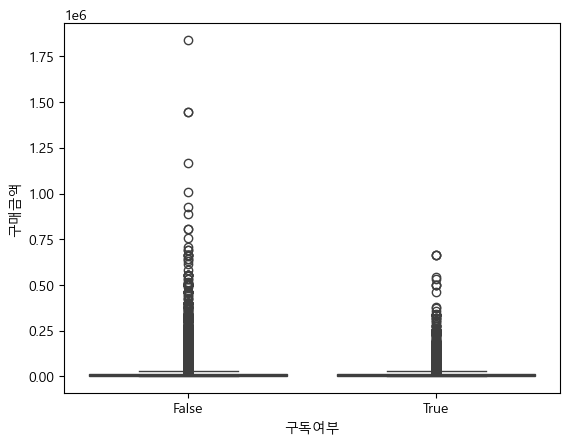

In [5]:
morning_data = final_data[final_data['구독여부']==True]['구매금액']
afternoon_data = final_data[final_data['구독여부'] ==False]['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var = False)
amount1 = final_data[final_data['구독여부'] == True]['구매금액']
amount2 = final_data[final_data['구독여부'] == False]['구매금액']
boxplot=sns.boxplot(x='구독여부', y='구매금액', data=final_data)
# boxplot.figure.savefig('boxplot11.png')
print("t-statistic:", t_stat)
print("p-value:", p_value)

In [6]:
final_data['구독여부'].unique()
morning_data = final_data[final_data['구독여부']==True]['구매금액']
afternoon_data = final_data[final_data['구독여부'] ==False]['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var = False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -6.197003836158242
p-value: 5.764454710388664e-10


In [7]:
# 등분산성 검정 (Bartlett's test)
bartlett_stat, bartlett_p_value = stats.bartlett(morning_data, afternoon_data)
print("Bartlett's test statistic:", bartlett_stat)
print("Bartlett's test p-value:", bartlett_p_value)

Bartlett's test statistic: 3026.646658032581
Bartlett's test p-value: 0.0


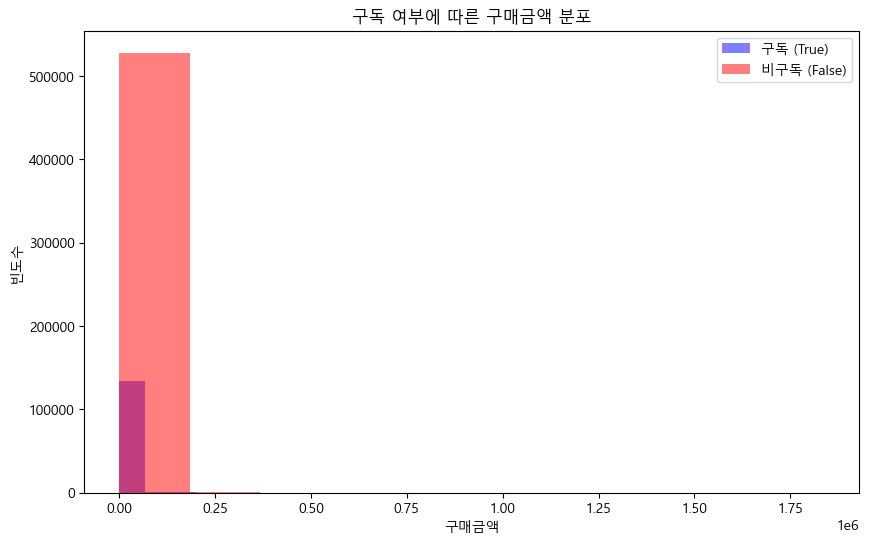

In [8]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))

plt.hist(morning_data, bins=10, alpha=0.5, label='구독 (True)', color='blue')
plt.hist(afternoon_data, bins=10, alpha=0.5, label='비구독 (False)', color='red')

plt.xlabel('구매금액')
plt.ylabel('빈도수')
plt.title('구독 여부에 따른 구매금액 분포')
plt.legend(loc='upper right')

Text(0.5, 1.0, '구독 여부에 따른 구매금액 분포')

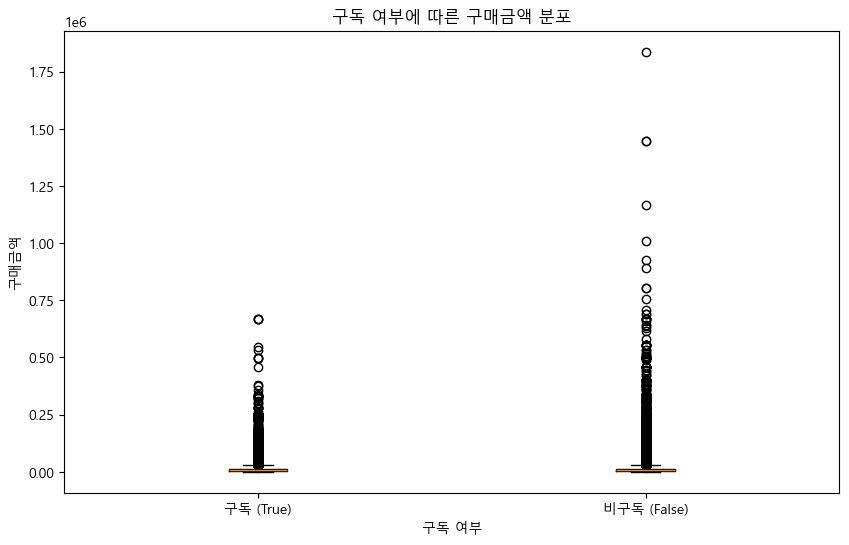

In [9]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))

# 구독 여부에 따라 구매수량을 리스트로 변환
data_to_plot = [morning_data, afternoon_data]

plt.boxplot(data_to_plot, labels=['구독 (True)', '비구독 (False)'])

plt.xlabel('구독 여부')
plt.ylabel('구매금액')
plt.title('구독 여부에 따른 구매금액 분포')

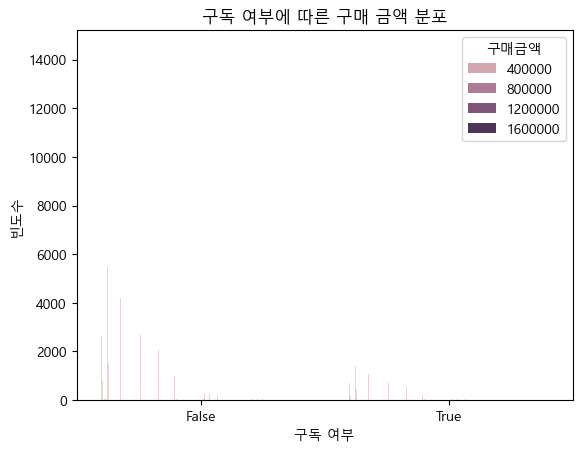

In [206]:
# 구독 여부에 따른 구매 금액의 빈도 시각화
sns.countplot(data=final_data, x='구독여부', hue='구매금액')
plt.title('구독 여부에 따른 구매 금액 분포')
plt.xlabel('구독 여부')
plt.ylabel('빈도수')
# plt.ylim(0, 6000)  # y축 범위를 0에서 8000까지로 설정
plt.legend(title='구매금액')
plt.show()

# 구독 여부별 구매수량 차이 분석

t-statistic: -1.9551744391997776
p-value: 0.05056383035480679


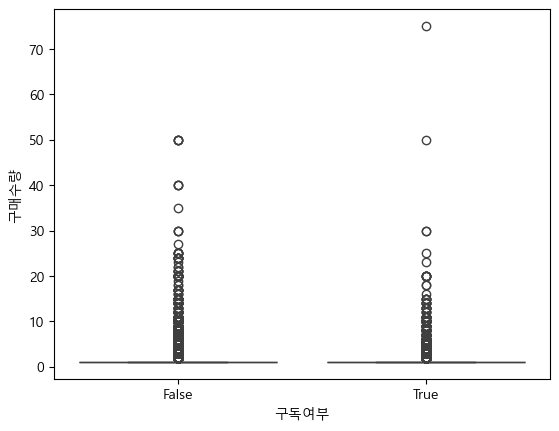

In [246]:
morning_data = final_data[final_data['구독여부']==True]['구매수량']
afternoon_data = final_data[final_data['구독여부'] ==False]['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var = False)
amount1 = final_data[final_data['구독여부'] == True]['구매수량']
amount2 = final_data[final_data['구독여부'] == False]['구매수량']
boxplot=sns.boxplot(x='구독여부', y='구매수량', data=final_data)
# boxplot.figure.savefig('boxplot11.png')
print("t-statistic:", t_stat)
print("p-value:", p_value)

In [231]:
final_data['구독여부'].unique()
morning_data = final_data[final_data['구독여부']==True]['구매수량']
afternoon_data = final_data[final_data['구독여부'] ==False]['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var = False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -1.9551744391997776
p-value: 0.05056383035480679


In [232]:
# 등분산성 검정 (Bartlett's test)
bartlett_stat, bartlett_p_value = stats.bartlett(morning_data, afternoon_data)
print("Bartlett's test statistic:", bartlett_stat)
print("Bartlett's test p-value:", bartlett_p_value)

Bartlett's test statistic: 61.90324219797495
Bartlett's test p-value: 3.60755073749232e-15


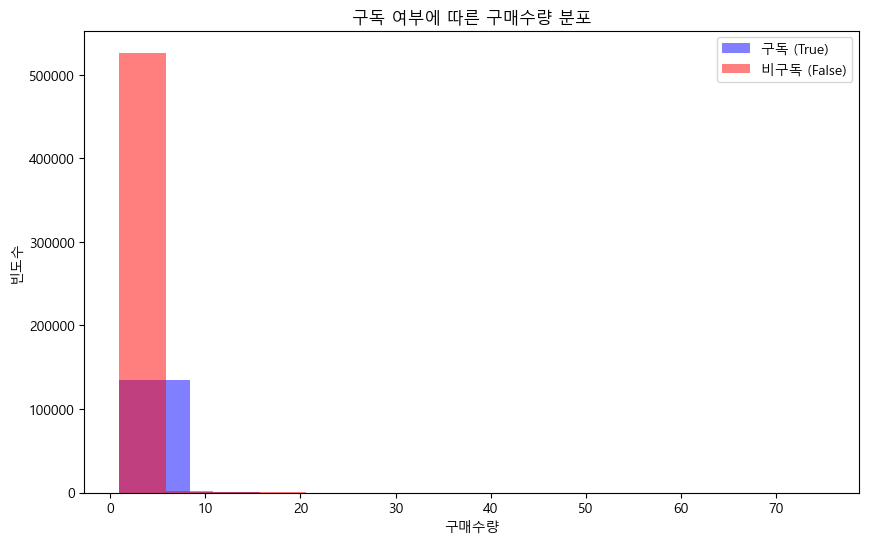

In [191]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))

plt.hist(morning_data, bins=10, alpha=0.5, label='구독 (True)', color='blue')
plt.hist(afternoon_data, bins=10, alpha=0.5, label='비구독 (False)', color='red')

plt.xlabel('구매수량')
plt.ylabel('빈도수')
plt.title('구독 여부에 따른 구매수량 분포')
plt.legend(loc='upper right')

Text(0.5, 1.0, '구독 여부에 따른 구매수량 분포')

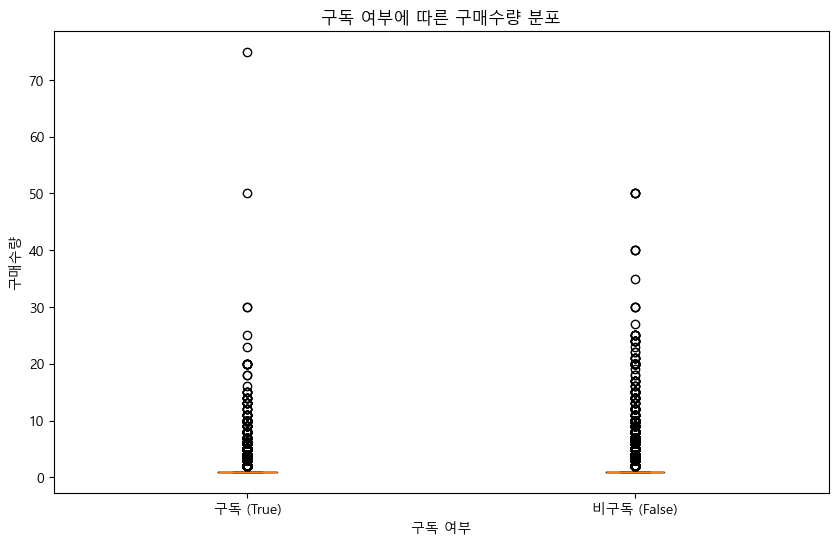

In [192]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))

# 구독 여부에 따라 구매수량을 리스트로 변환
data_to_plot = [morning_data, afternoon_data]

plt.boxplot(data_to_plot, labels=['구독 (True)', '비구독 (False)'])

plt.xlabel('구독 여부')
plt.ylabel('구매수량')
plt.title('구독 여부에 따른 구매수량 분포')

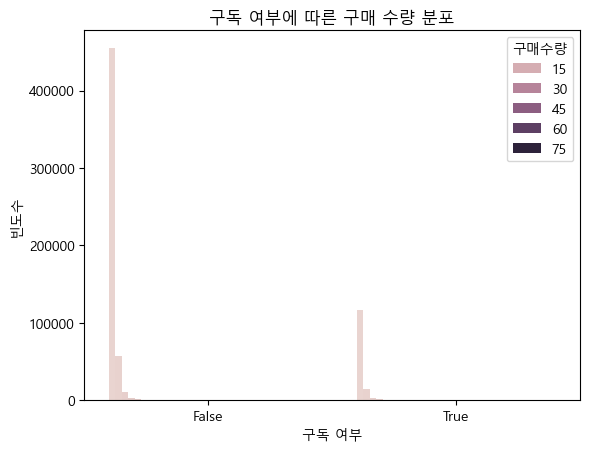

In [194]:
# 구독 여부에 따른 구매 수량의 빈도 시각화
sns.countplot(data=final_data, x='구독여부', hue='구매수량')
plt.title('구독 여부에 따른 구매 수량 분포')
plt.xlabel('구독 여부')
plt.ylabel('빈도수')
plt.legend(title='구매수량')
plt.show()

# 구독 여부별 사용 적립금 차이

t-statistic: -2.250207348848896
p-value: 0.02443679464208183


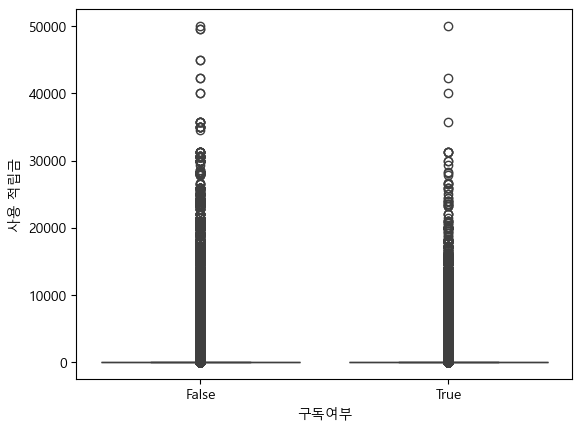

In [248]:
morning_data = final_data[final_data['구독여부']==True]['사용 적립금']
afternoon_data = final_data[final_data['구독여부'] ==False]['사용 적립금']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var = False)
amount1 = final_data[final_data['구독여부'] == True]['사용 적립금']
amount2 = final_data[final_data['구독여부'] == False]['사용 적립금']
boxplot=sns.boxplot(x='구독여부', y='사용 적립금', data=final_data)
# boxplot.figure.savefig('boxplot11.png')
print("t-statistic:", t_stat)
print("p-value:", p_value)

In [235]:
final_data['구독여부'].unique()
morning_data = final_data[final_data['구독여부']==True]['사용 적립금']
afternoon_data = final_data[final_data['구독여부'] ==False]['사용 적립금']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var = False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -2.250207348848896
p-value: 0.02443679464208183


In [234]:
# 등분산성 검정 (Bartlett's test)
bartlett_stat, bartlett_p_value = stats.bartlett(morning_data, afternoon_data)
print("Bartlett's test statistic:", bartlett_stat)
print("Bartlett's test p-value:", bartlett_p_value)

Bartlett's test statistic: 227.79142500832506
Bartlett's test p-value: 1.8071985233366392e-51


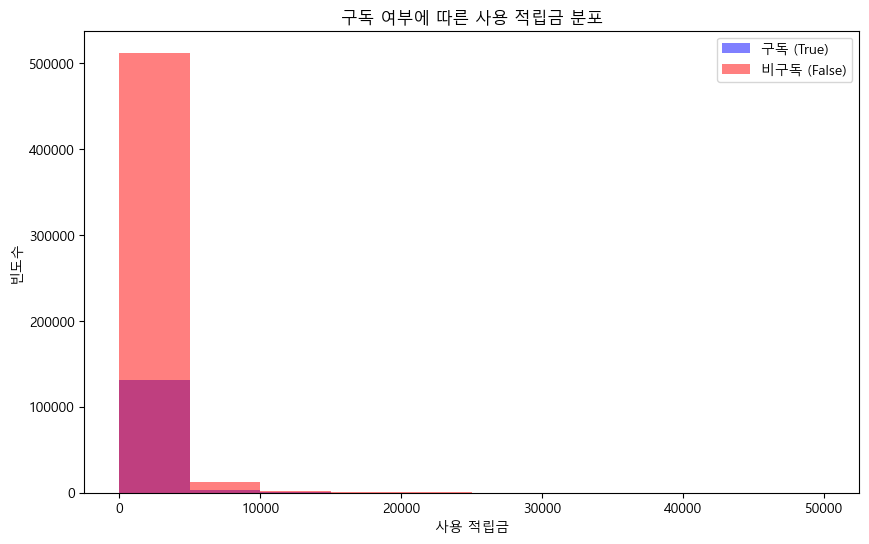

In [236]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))

plt.hist(morning_data, bins=10, alpha=0.5, label='구독 (True)', color='blue')
plt.hist(afternoon_data, bins=10, alpha=0.5, label='비구독 (False)', color='red')

plt.xlabel('사용 적립금')
plt.ylabel('빈도수')
plt.title('구독 여부에 따른 사용 적립금 분포')
plt.legend(loc='upper right')

Text(0.5, 1.0, '구독 여부에 따른 사용 적립금 분포')

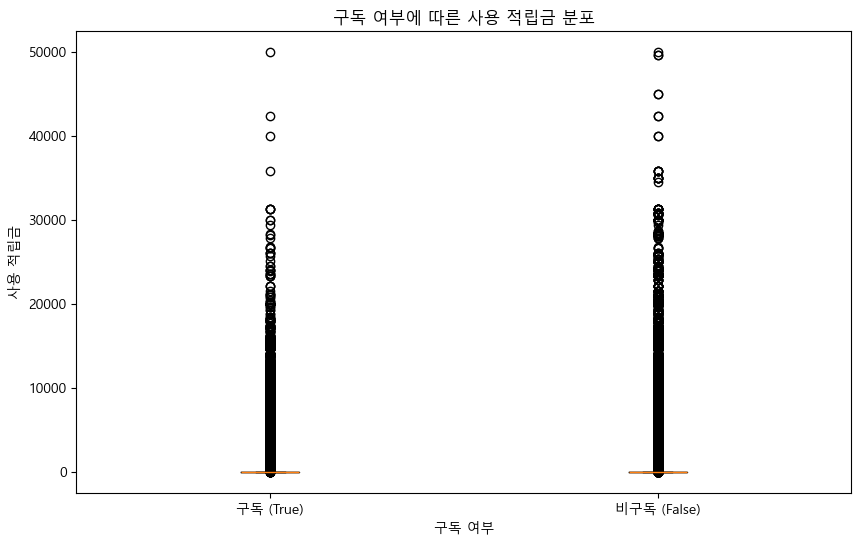

In [204]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))

# 구독 여부에 따라 구매수량을 리스트로 변환
data_to_plot = [morning_data, afternoon_data]

plt.boxplot(data_to_plot, labels=['구독 (True)', '비구독 (False)'])

plt.xlabel('구독 여부')
plt.ylabel('사용 적립금')
plt.title('구독 여부에 따른 사용 적립금 분포')

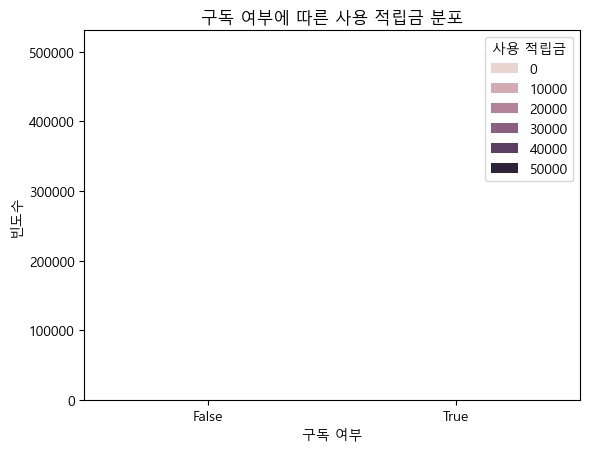

In [205]:
# 구독 여부에 따른 구매 금액의 빈도 시각화
sns.countplot(data=final_data, x='구독여부', hue='사용 적립금')
plt.title('구독 여부에 따른 사용 적립금 분포')
plt.xlabel('구독 여부')
plt.ylabel('빈도수')
# plt.ylim(0, 6000)  # y축 범위를 0에서 8000까지로 설정
plt.legend(title='사용 적립금')
plt.show()

# 구매시간(오전/오후) 별 구매 금액

In [209]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663047 entries, 0 to 663793
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        663047 non-null  int64  
 1   회원상태        663047 non-null  object 
 2   구매수량        663047 non-null  float64
 3   구매금액        663047 non-null  float64
 4   주문일시        663047 non-null  object 
 5   배송시작일       632626 non-null  object 
 6   배송완료일       632626 non-null  object 
 7   사용 적립금      663047 non-null  int64  
 8   사용 포인트 네이버  663047 non-null  int64  
 9   주문취소여부      30421 non-null   object 
 10  주문시간        663047 non-null  object 
 11  제품번호        663047 non-null  object 
 12  배송기간        632626 non-null  object 
 13  오전오후        663047 non-null  object 
 14  성별          663047 non-null  object 
 15  나이          663047 non-null  float64
 16  등록카드        663047 non-null  object 
 17  결혼          663047 non-null  object 
 18  구독여부        663047 non-null  bool   
 19  주소지    

In [239]:
final_data['오전오후'].unique()
morning_data = final_data[final_data['오전오후']=='오전']['구매금액']
afternoon_data = final_data[final_data['오전오후'] =='오후']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var = False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 1.3522246590661995
p-value: 0.1763044928963611


In [238]:
# 등분산성 검정 (Bartlett's test)
bartlett_stat, bartlett_p_value = stats.bartlett(morning_data, afternoon_data)
print("Bartlett's test statistic:", bartlett_stat)
print("Bartlett's test p-value:", bartlett_p_value)

Bartlett's test statistic: 1835.7714588307206
Bartlett's test p-value: 0.0


In [127]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))

plt.hist(morning_data, bins=10, alpha=0.5, label='구독 (True)', color='blue')
plt.hist(afternoon_data, bins=10, alpha=0.5, label='비구독 (False)', color='red')

plt.xlabel('사용 적립금')
plt.ylabel('빈도수')
plt.title('구독 여부에 따른 사용 적립금 분포')
plt.legend(loc='upper right')

t-통계량: 1.3635529319828459
p-값: 0.1727093528535897


In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))

# 구독 여부에 따라 구매수량을 리스트로 변환
data_to_plot = [morning_data, afternoon_data]

plt.boxplot(data_to_plot, labels=['구독 (True)', '비구독 (False)'])

plt.xlabel('구독 여부')
plt.ylabel('사용 적립금')
plt.title('구독 여부에 따른 사용 적립금 분포')

# 성별별 구매금액

In [212]:
final_data['성별'].unique()

array(['여', '남'], dtype=object)

In [243]:
final_data['성별'].unique()
morning_data = final_data[final_data['성별']=='남']['구매금액']
afternoon_data = final_data[final_data['성별'] =='여']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -1.511580247685714
p-value: 0.1306473370996543


In [241]:
# 등분산성 검정 (Bartlett's test)
bartlett_stat, bartlett_p_value = stats.bartlett(morning_data, afternoon_data)
print("Bartlett's test statistic:", bartlett_stat)
print("Bartlett's test p-value:", bartlett_p_value)

Bartlett's test statistic: 36.43036193165047
Bartlett's test p-value: 1.5821924781155454e-09


In [130]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))

plt.hist(morning_data, bins=10, alpha=0.5, label='구독 (True)', color='blue')
plt.hist(afternoon_data, bins=10, alpha=0.5, label='비구독 (False)', color='red')

plt.xlabel('사용 적립금')
plt.ylabel('빈도수')
plt.title('구독 여부에 따른 사용 적립금 분포')
plt.legend(loc='upper right')

In [151]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))

# 구독 여부에 따라 구매수량을 리스트로 변환
data_to_plot = [morning_data, afternoon_data]

plt.boxplot(data_to_plot, labels=['구독 (True)', '비구독 (False)'])

plt.xlabel('구독 여부')
plt.ylabel('사용 적립금')
plt.title('구독 여부에 따른 사용 적립금 분포')

# ---------------------------------------------------------------------------

# 연령대별 친환경 제품 구매 수량 차이 파악 - anova

In [10]:
# 유기농 또는 신선/유기농인 제품 필터링
organic_fresh_data = final_data[final_data['유기신선'].isin(['유기농', '신선/유기농'])]

# 연령대별 구매 수량 합계 계산
age_group_purchase_quantity = organic_fresh_data.groupby('연령대')['구매수량'].sum().reset_index()
print(age_group_purchase_quantity)

   연령대      구매수량
0  10대     339.0
1  20대   42752.0
2  30대  165329.0
3  40대  140982.0
4  50대   78981.0
5  60대   43900.0
6  70대    9484.0
7  80대    1222.0


In [11]:
# 유기농 또는 신선/유기농인 제품 필터링
organic_fresh_data = final_data[final_data['유기신선'].isin(['유기농', '신선/유기농'])]

# 연령대별 구매 수량 데이터 분리
age_groups = organic_fresh_data['연령대'].unique()
purchase_quantities = [organic_fresh_data[organic_fresh_data['연령대'] == age_group]['구매수량'] for age_group in age_groups]

# 아노바 검정 수행
f_stat, p_val = stats.f_oneway(*purchase_quantities)
print(f'F-statistic: {f_stat}, p-value: {p_val}')

F-statistic: 45.341825741323376, p-value: 1.2358437845244388e-64


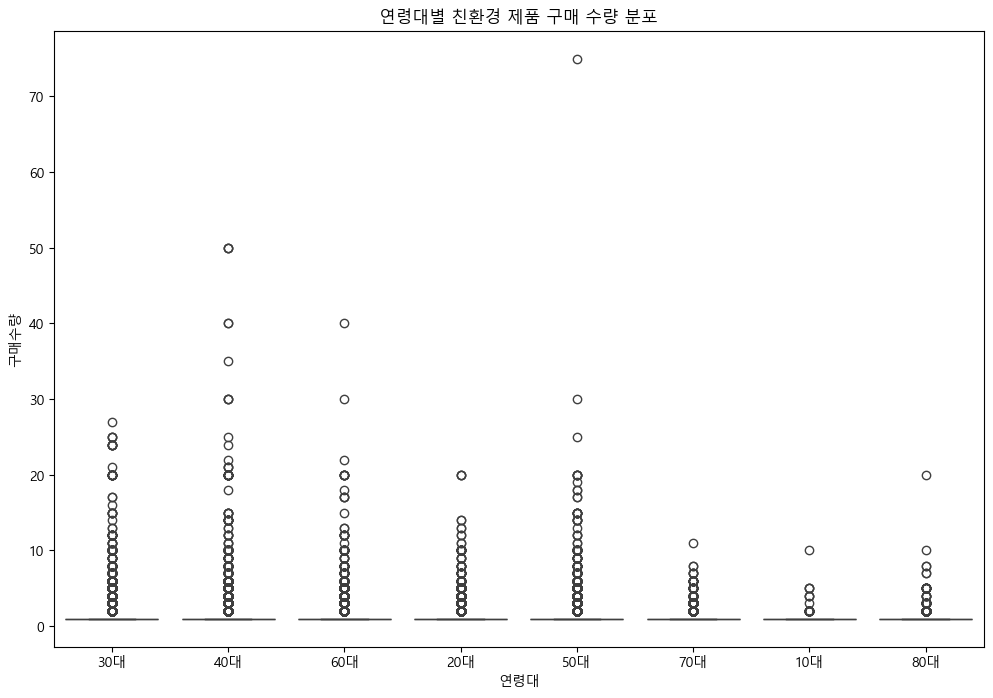

In [12]:
# 유기농 또는 신선/유기농인 제품 필터링
organic_fresh_data = final_data[final_data['유기신선'].isin(['유기농', '신선/유기농'])]

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='연령대', y='구매수량', data=organic_fresh_data)
plt.xlabel('연령대')
plt.ylabel('구매수량')
plt.title('연령대별 친환경 제품 구매 수량 분포')
# 이미지 파일로 저장
plt.savefig('age_group_purchase_quantity_boxplot.png')
plt.show()

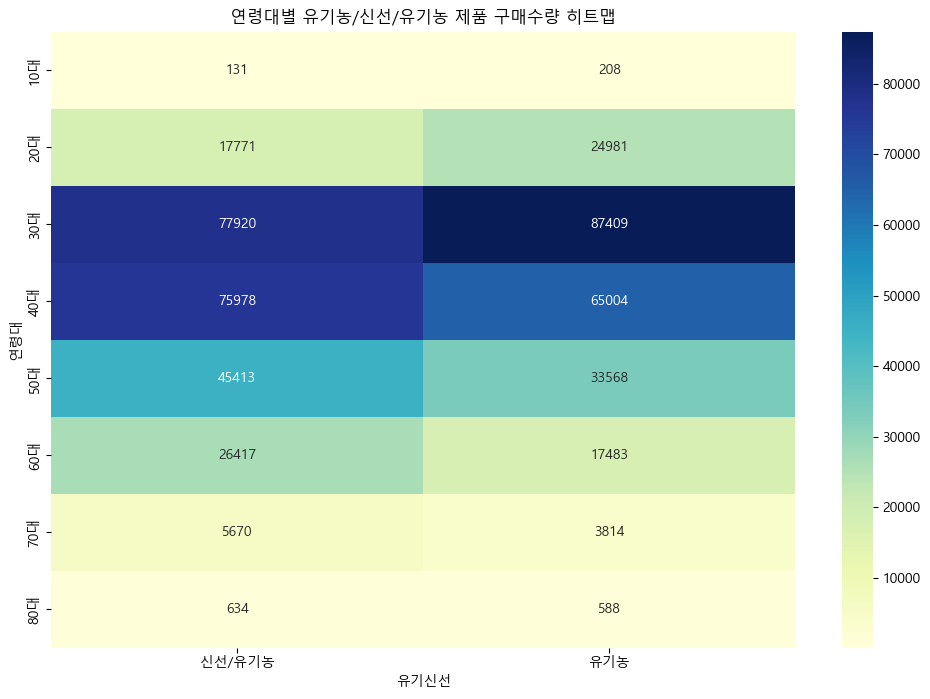

In [62]:
# '유기농'과 '신선/유기농' 필터링
filtered_data = final_data[final_data['유기신선'].isin(['유기농', '신선/유기농'])]

# 연령대별, 유기신선별 구매수량 합계 계산
grouped_data = filtered_data.groupby(['연령대', '유기신선'])['구매수량'].sum().reset_index()

# 피벗 테이블 생성
pivot_table = grouped_data.pivot(index = '연령대', columns = '유기신선', values = '구매수량')

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('연령대별 유기농/신선/유기농 제품 구매수량 히트맵')
plt.savefig('age_group_organic_fresh_purchase_heatmap.png')

plt.show()

# 2sam ttest

## 10대

In [16]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='10대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='20대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 3.649535937093039
p-value: 0.00026294270737605563


In [17]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='10대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='30대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 3.1505481083928903
p-value: 0.0016298493884587502


In [18]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='10대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='40대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 2.1723158587910874
p-value: 0.02983302757984822


In [19]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='10대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='50대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 1.1575501740303156
p-value: 0.24705031227896782


In [20]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='10대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='60대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.5995550762801483
p-value: 0.5488051966744738


In [21]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='10대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='70대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 2.3632101287981335
p-value: 0.01813160965081368


In [22]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='10대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='80대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -1.026705902302264
p-value: 0.3046807506724897


## 20대

In [23]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='20대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='30대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -2.890295869001081
p-value: 0.003849077875854161


In [24]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='20대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='40대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -9.604762887526066
p-value: 7.6984502663065755e-22


In [25]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='20대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='50대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -17.013203533439093
p-value: 7.468253311334313e-65


In [26]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='20대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='60대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -19.381865724048442
p-value: 1.4970141362229171e-83


In [27]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='20대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='70대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -5.688837680773548
p-value: 1.2840839996950198e-08


In [28]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='20대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='80대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -9.428815755218126
p-value: 4.290186004902606e-21


## 30대

In [30]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='30대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='40대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -10.94452328932613
p-value: 7.118741659403721e-28


In [31]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='30대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='50대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -21.020803806850168
p-value: 4.894390680018146e-98


In [32]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='30대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='60대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -22.570215962162468
p-value: 1.0645200543294488e-112


In [33]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='30대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='70대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -4.298106126490483
p-value: 1.7232968811700494e-05


In [34]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='30대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='80대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -8.517446793292308
p-value: 1.6404993409824997e-17


## 40대

In [35]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='40대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='50대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -11.074470615943227
p-value: 1.6899309526427227e-28


In [36]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='40대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='60대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -14.100912120166123
p-value: 3.8992325549065616e-45


In [37]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='40대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='70대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -0.3800926356288921
p-value: 0.7038770354005628


In [38]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='40대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='80대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -6.502224683032914
p-value: 7.932670856441177e-11


## 50대

In [39]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='50대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='60대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -4.567271648389763
p-value: 4.944822682858608e-06


In [40]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='50대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='70대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 4.119594488444602
p-value: 3.798017730608757e-05


In [41]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='50대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='80대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -4.516282119727449
p-value: 6.300315618865455e-06


## 60대

In [42]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='60대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='70대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 6.323869843219511
p-value: 2.566488270550234e-10


In [43]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='60대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='80대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -3.389776256656609
p-value: 0.0006999656790247442


## 70대

In [44]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='70대']['구매수량']
afternoon_data = final_data[final_data['연령대'] =='80대']['구매수량']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -6.616316701781157
p-value: 3.812035219723443e-11


# 103060

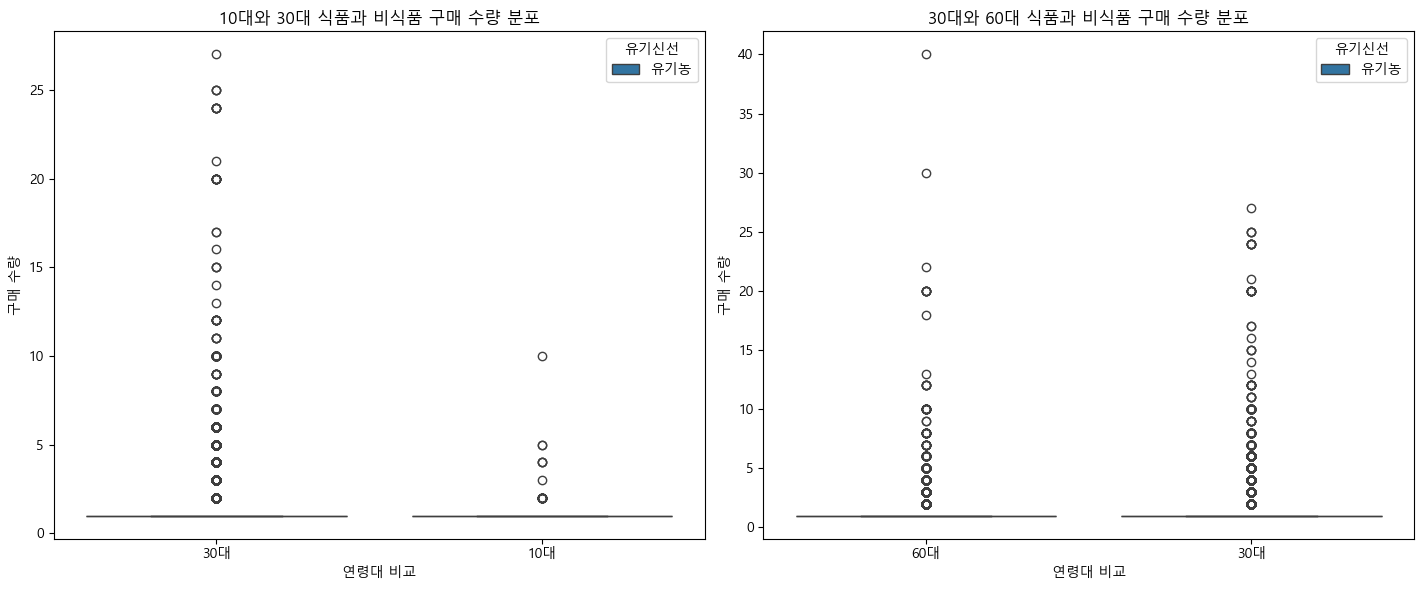

In [13]:
# 박스 플롯 생성
plt.figure(figsize=(21, 6))

# 30대와 50대 식품과 비식품 구매수량 박스 플롯 (연령대 구분)
plt.subplot(1, 3, 2)
sns.boxplot(x='연령대', y='구매수량', hue='유기신선', data=final_data[(final_data['연령대'].isin(['10대', '30대'])) & (final_data['유기신선'].isin(['유기농', '신선유기농']))])
plt.title('10대와 30대 식품과 비식품 구매 수량 분포')
plt.xlabel('연령대 비교')
plt.ylabel('구매 수량')

# 30대와 60대 식품과 비식품 구매수량 박스 플롯
plt.subplot(1, 3, 3)
sns.boxplot(x='연령대', y='구매수량', hue='유기신선', data=final_data[(final_data['연령대'].isin(['30대', '60대'])) & (final_data['유기신선'].isin(['유기농', '신선유기농']))])
plt.title('30대와 60대 식품과 비식품 구매 수량 분포')
plt.xlabel('연령대 비교')
plt.ylabel('구매 수량')

plt.tight_layout()
plt.show()

# 연령대별 구매 금액 차이 파악

In [264]:
# 연령대별 구매 금액 합계 계산
age_group_purchase_amount = final_data.groupby('연령대')['구매금액'].sum().reset_index()
print(age_group_purchase_amount)

   연령대          구매금액
0  10대  5.281921e+06
1  20대  6.059824e+08
2  30대  2.607466e+09
3  40대  2.458426e+09
4  50대  1.284282e+09
5  60대  6.975044e+08
6  70대  1.625281e+08
7  80대  1.400342e+07


In [267]:
# 연령대별 구매 금액 데이터 분리
age_groups = final_data['연령대'].unique()
purchase_amounts = [final_data[final_data['연령대'] == age_group]['구매금액'] for age_group in age_groups]

# 아노바 검정 수행
f_stat, p_val = stats.f_oneway(*purchase_amounts)
print(f'F-statistic: {f_stat}, p-value: {p_val}')

F-statistic: 199.85421069768338, p-value: 1.3339794451958529e-297


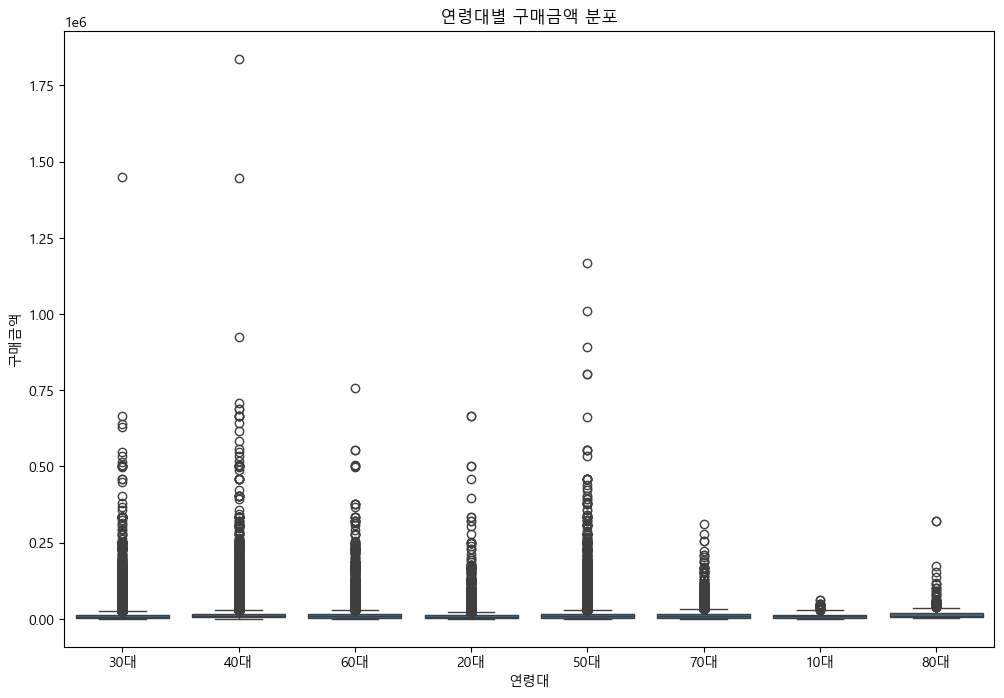

In [298]:
# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='연령대', y='구매금액', data=final_data)
plt.xlabel('연령대')
plt.ylabel('구매금액')
plt.title('연령대별 구매금액 분포')
# 이미지 파일로 저장
plt.savefig('age_group_purchase_quantity_boxplot.png')
plt.show()

# 2sam ttest

In [308]:
final_data['연령대'].unique()
morning_data = final_data[final_data['연령대']=='80대']['구매금액']
afternoon_data = final_data[final_data['연령대'] =='50대']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 7.394627218989007
p-value: 1.4286233345163363e-13


# 식품/비식품별 구매 금액 차이 파악

In [268]:
# 식품/비식품별 구매 금액 합계 계산
food_purchase_amount = final_data.groupby('식품/비식품')['구매금액'].sum().reset_index()
print(food_purchase_amount)

  식품/비식품          구매금액
0     기타  2.559865e+08
1    비식품  4.517969e+08
2     식품  7.127691e+09


In [269]:
# 식품/비식품별 구매 금액 데이터 분리
food_groups = final_data['식품/비식품'].unique()
purchase_amounts = [final_data[final_data['식품/비식품'] == food_group]['구매금액'] for food_group in food_groups]

# 아노바 검정 수행
f_stat, p_val = stats.f_oneway(*purchase_amounts)
print(f'F-statistic: {f_stat}, p-value: {p_val}')

F-statistic: 6959.24968529293, p-value: 0.0


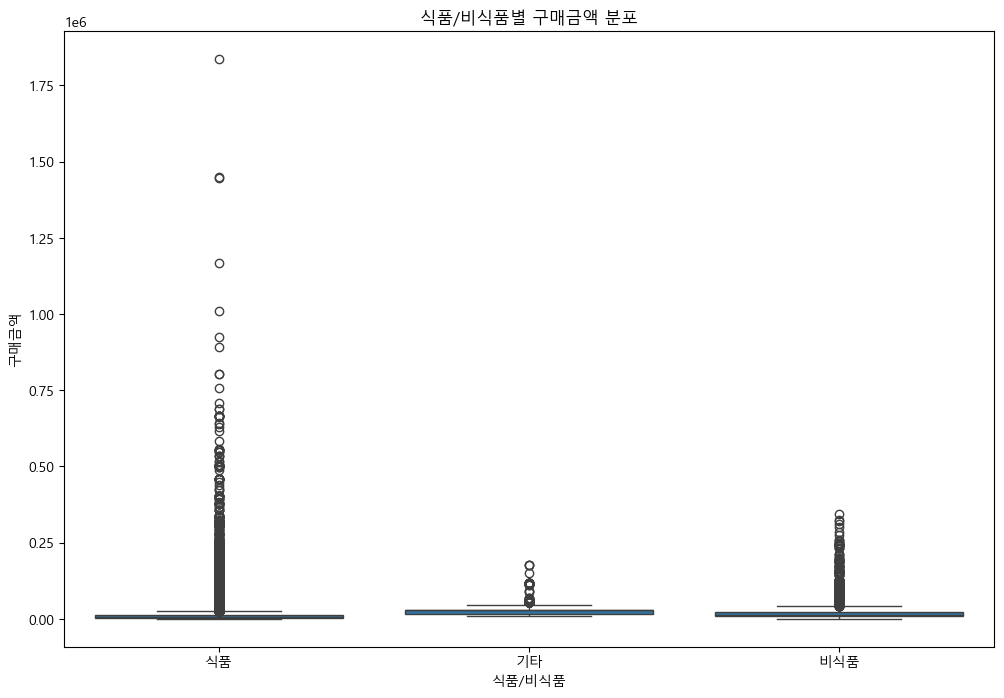

In [299]:
# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='식품/비식품', y='구매금액', data=final_data)
plt.xlabel('식품/비식품')
plt.ylabel('구매금액')
plt.title('식품/비식품별 구매금액 분포')
plt.savefig('age_group_purchase_quantity_boxplot.png')
plt.show()

# 2sam ttest

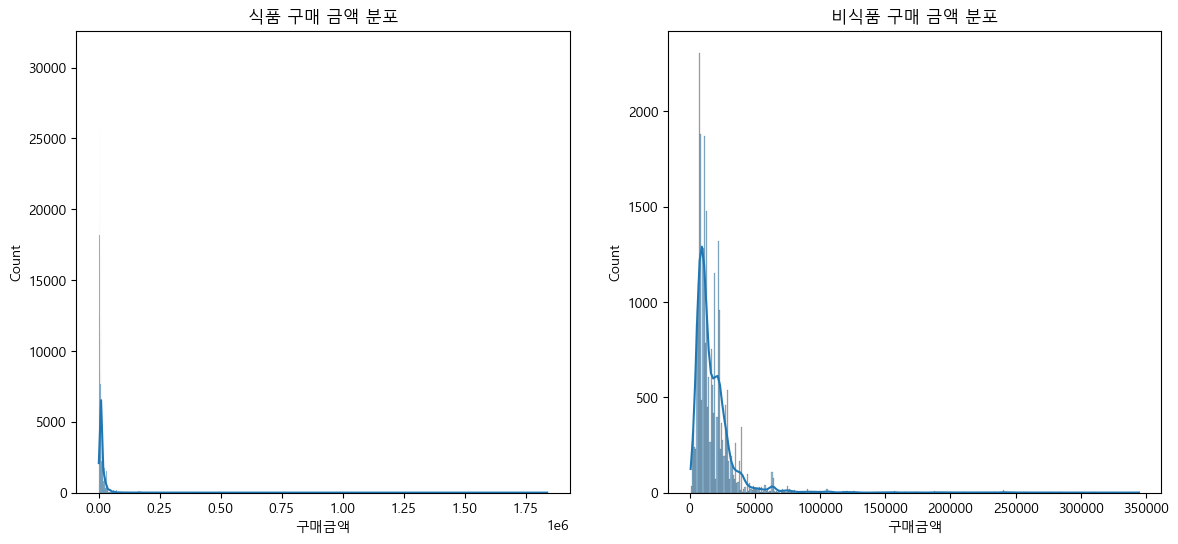

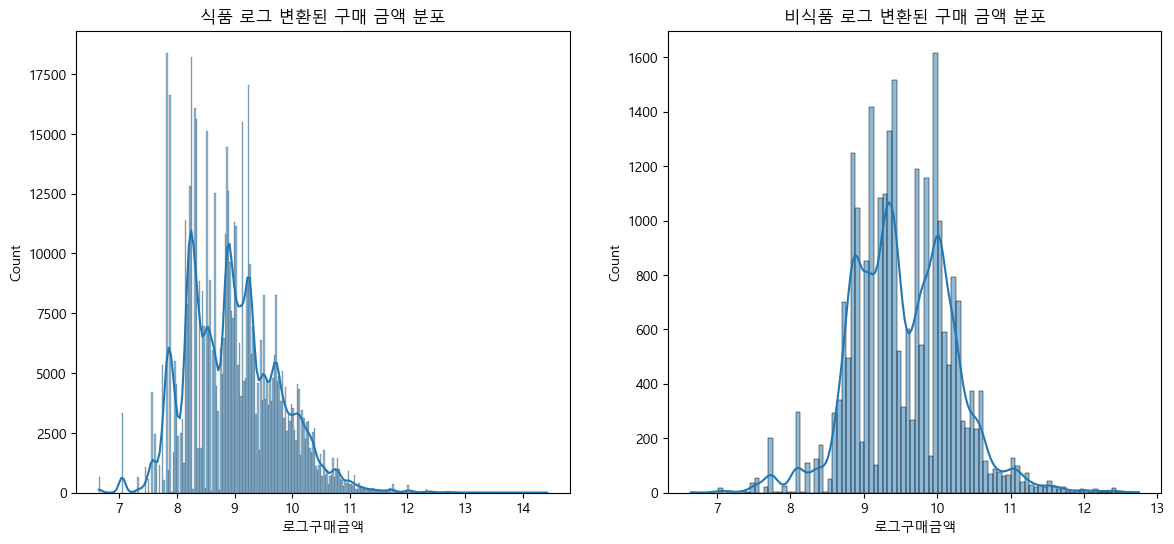

t-statistic: -129.69144486565523
p-value: 0.0


In [319]:
# '식품'과 '비식품'의 구매 금액 분포 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(final_data[final_data['식품/비식품'] == '식품']['구매금액'], kde=True)
plt.title('식품 구매 금액 분포')

plt.subplot(1, 2, 2)
sns.histplot(final_data[final_data['식품/비식품'] == '비식품']['구매금액'], kde=True)
plt.title('비식품 구매 금액 분포')

plt.show()

# 로그 변환 적용
final_data['로그구매금액'] = np.log1p(final_data['구매금액'])

# '식품'과 '비식품'의 로그 변환된 구매 금액 분포 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(final_data[final_data['식품/비식품'] == '식품']['로그구매금액'], kde=True)
plt.title('식품 로그 변환된 구매 금액 분포')

plt.subplot(1, 2, 2)
sns.histplot(final_data[final_data['식품/비식품'] == '비식품']['로그구매금액'], kde=True)
plt.title('비식품 로그 변환된 구매 금액 분포')

plt.show()

# 2 샘플 t-테스트 수행 (로그 변환된 데이터 사용)
morning_data = final_data[final_data['식품/비식품'] == '식품']['로그구매금액']
afternoon_data = final_data[final_data['식품/비식품'] == '비식품']['로그구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

In [4]:
final_data['식품/비식품'].unique()
morning_data = final_data[final_data['식품/비식품']=='식품']['구매금액']
afternoon_data = final_data[final_data['식품/비식품'] =='비식품']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data,equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -58.5876482012824
p-value: 0.0


In [5]:
final_data['식품/비식품'].unique()
morning_data = final_data[final_data['식품/비식품']=='식품']['구매금액']
afternoon_data = final_data[final_data['식품/비식품'] =='기타']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -100.77081567323742
p-value: 0.0


In [6]:
final_data['식품/비식품'].unique()
morning_data = final_data[final_data['식품/비식품']=='비식품']['구매금액']
afternoon_data = final_data[final_data['식품/비식품'] =='기타']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -53.977470032119726
p-value: 0.0


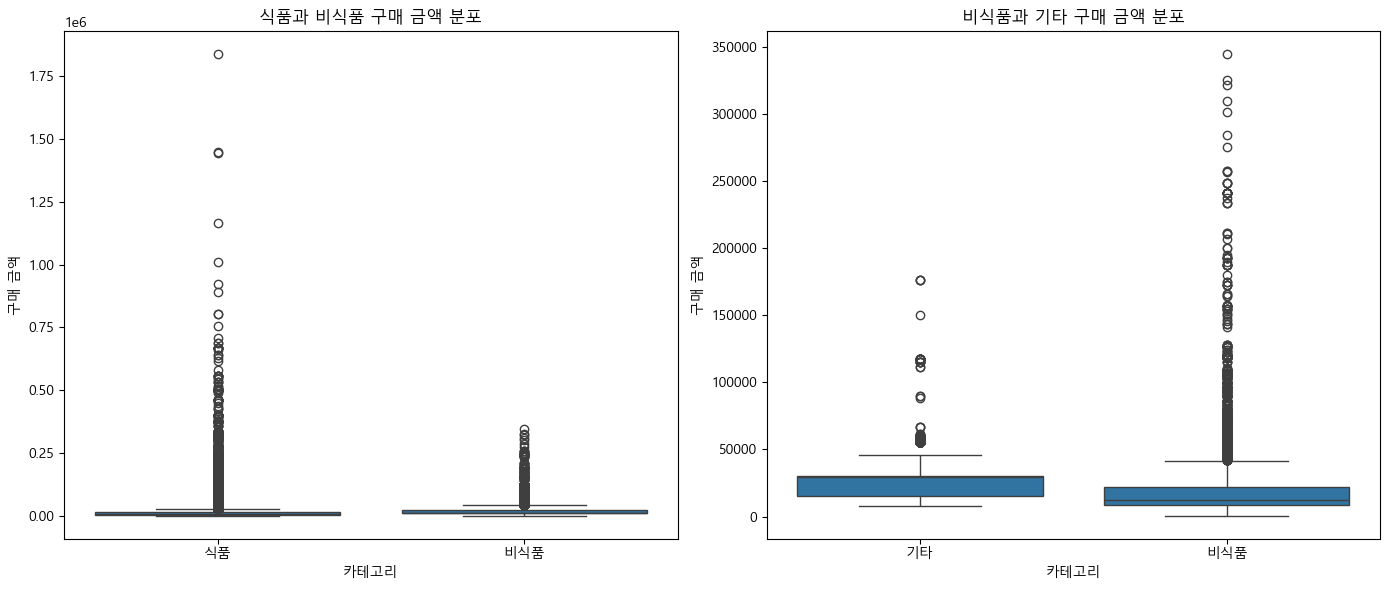

In [316]:
# 박스 플롯 생성
plt.figure(figsize=(14, 6))

# 식품과 비식품 구매금액 박스 플롯
plt.subplot(1, 2, 1)
sns.boxplot(x='식품/비식품', y='구매금액', data=relevant_data[relevant_data['식품/비식품'].isin(['식품', '비식품'])])
plt.title('식품과 비식품 구매 금액 분포')
plt.xlabel('카테고리')
plt.ylabel('구매 금액')

# 비식품과 기타 구매금액 박스 플롯
plt.subplot(1, 2, 2)
sns.boxplot(x='식품/비식품', y='구매금액', data=relevant_data[relevant_data['식품/비식품'].isin(['비식품', '기타'])])
plt.title('비식품과 기타 구매 금액 분포')
plt.xlabel('카테고리')
plt.ylabel('구매 금액')

plt.tight_layout()
plt.show()

# 유기신선별 구매 금액 차이 파악

In [8]:
# 유기신선별 구매 금액 합계 계산
fresh_purchase_amount = final_data.groupby('유기신선')['구매금액'].sum().reset_index()
print(fresh_purchase_amount)

     유기신선        구매금액
0      기타   708075163
1     비식품   708128491
2      신선  2367673165
3  신선/유기농  1675438881
4     유기농  2385654808


In [7]:
# 식품/비식품별 구매 금액 데이터 분리
fresh_groups = final_data['유기신선'].unique()
purchase_amounts = [final_data[final_data['유기신선'] == fresh_group]['구매금액'] for fresh_group in fresh_groups]

# 아노바 검정 수행
f_stat, p_val = stats.f_oneway(*purchase_amounts)
print(f'F-statistic: {f_stat}, p-value: {p_val}')

F-statistic: 7540.1927885489695, p-value: 0.0


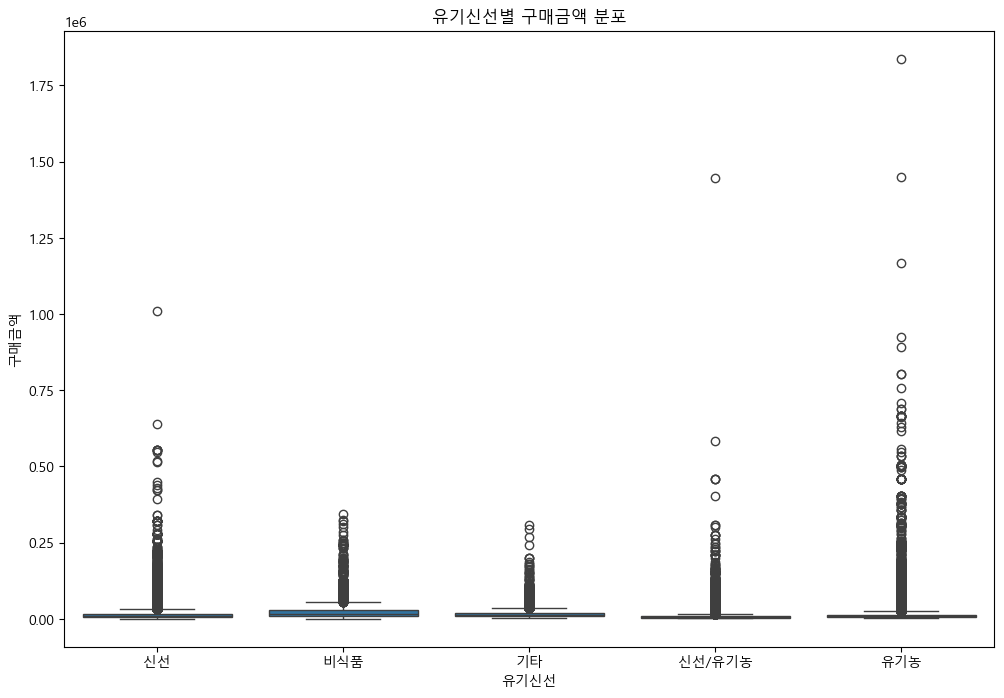

In [300]:
# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='유기신선', y='구매금액', data=final_data)
plt.xlabel('유기신선')
plt.ylabel('구매금액')
plt.title('유기신선별 구매금액 분포')
plt.savefig('age_group_purchase_quantity_boxplot.png')
plt.show()

# 2sam ttest

In [11]:
final_data['유기신선'].unique()
morning_data = final_data[final_data['유기신선']=='기타']['구매금액']
afternoon_data = final_data[final_data['유기신선'] =='신선/유기농']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data,equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 136.5176477786797
p-value: 0.0


In [12]:
final_data['유기신선'].unique()
morning_data = final_data[final_data['유기신선']=='비식품']['구매금액']
afternoon_data = final_data[final_data['유기신선'] =='유기농']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data,equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 70.14174453007207
p-value: 0.0


In [13]:
final_data['유기신선'].unique()
morning_data = final_data[final_data['유기신선']=='신선/유기농']['구매금액']
afternoon_data = final_data[final_data['유기신선'] =='유기농']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data,equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -97.05557718451027
p-value: 0.0


In [ ]:
final_data['유기신선'].unique()
morning_data = final_data[final_data['유기신선']=='기타']['구매금액']
afternoon_data = final_data[final_data['유기신선'] =='비식품']['구매금액']
t_stat, p_value = stats.ttest_ind(morning_data, afternoon_data,equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# 요일별 구매 금액 차이 파악 -----

In [272]:
# 주문요일별 구매 금액 합계 계산
day_purchase_amount = final_data.groupby('주문요일')['구매금액'].sum().reset_index()
print(day_purchase_amount)

  주문요일          구매금액
0  금요일  1.398208e+09
1  목요일  6.150535e+08
2  수요일  1.143280e+09
3  월요일  1.155260e+09
4  일요일  1.149073e+09
5  토요일  1.184531e+09
6  화요일  1.190069e+09


In [274]:
# 주문요일별 구매 금액 데이터 분리
day_groups = final_data['주문요일'].unique()
purchase_amounts = [final_data[final_data['주문요일'] == day_group]['구매금액'] for day_group in day_groups]

# 아노바 검정 수행
f_stat, p_val = stats.f_oneway(*purchase_amounts)
print(f'F-statistic: {f_stat}, p-value: {p_val}')

F-statistic: 2.679597928580899, p-value: 0.013344290604478098


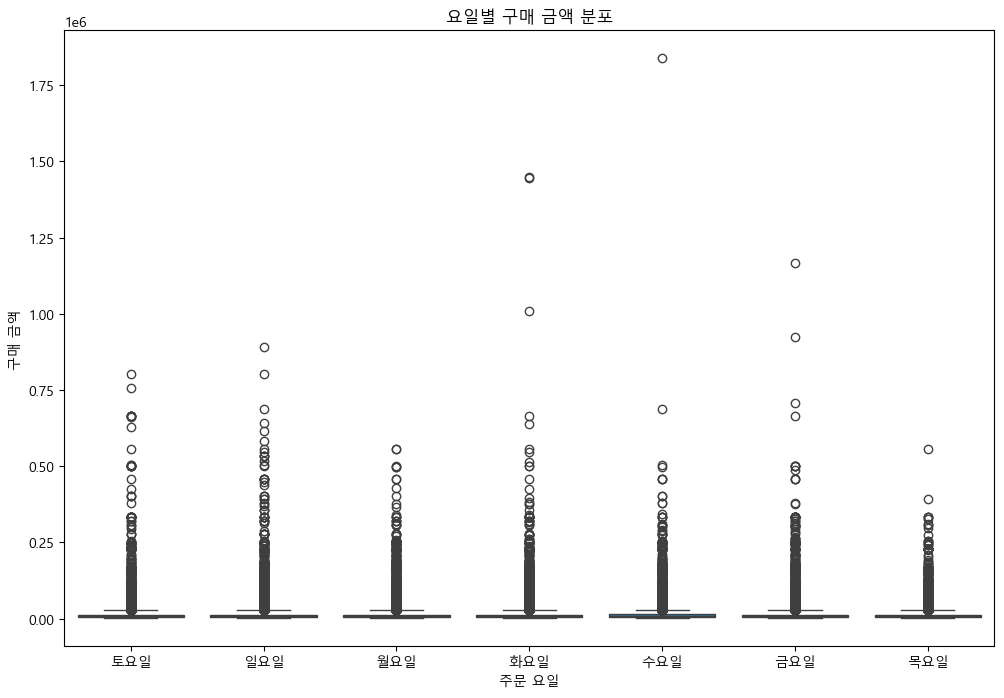

In [279]:
# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='주문요일', y='구매금액', data=final_data)
plt.xlabel('주문 요일')
plt.ylabel('구매 금액')
plt.title('요일별 구매 금액 분포')
plt.show()

# 등록카드별 사용 적립금 차이 파악 --귀무가설 채택

In [276]:
# 등록카드별 사용 적립금 합계 계산
card_usage_points = final_data.groupby('등록카드')['사용 적립금'].sum().reset_index()
print(card_usage_points)

       등록카드    사용 적립금
0      BC카드   5022301
1    SC제일은행   1896516
2      경남은행    214880
3      광주은행   1627155
4      국민은행  23056878
5      국민카드   7446096
6      기업은행   6317946
7     농협중앙회  14703968
8      대구은행   1184189
9      롯데카드  24876174
10  무통장계좌이체     72010
11   미래에셋증권    519460
12     부산은행   2033813
13     삼성카드   3764492
14    새마을금고   2812353
15     신한은행  18437862
16     신한카드   7773000
17    신협중앙회    733525
18     씨티은행   1473765
19    연결앱결제  19707049
20     외환은행    790498
21     우리은행  13144466
22      우체국   1483218
23     하나은행   6250047
24     현대카드   4430210


In [277]:
# 주문요일별 구매 금액 데이터 분리
card_groups = final_data['등록카드'].unique()
purchase_amounts = [final_data[final_data['등록카드'] == card_group]['사용 적립금'] for card_group in card_groups]

# 아노바 검정 수행
f_stat, p_val = stats.f_oneway(*purchase_amounts)
print(f'F-statistic: {f_stat}, p-value: {p_val}')

F-statistic: 1.1006243983446207, p-value: 0.33245434352036024


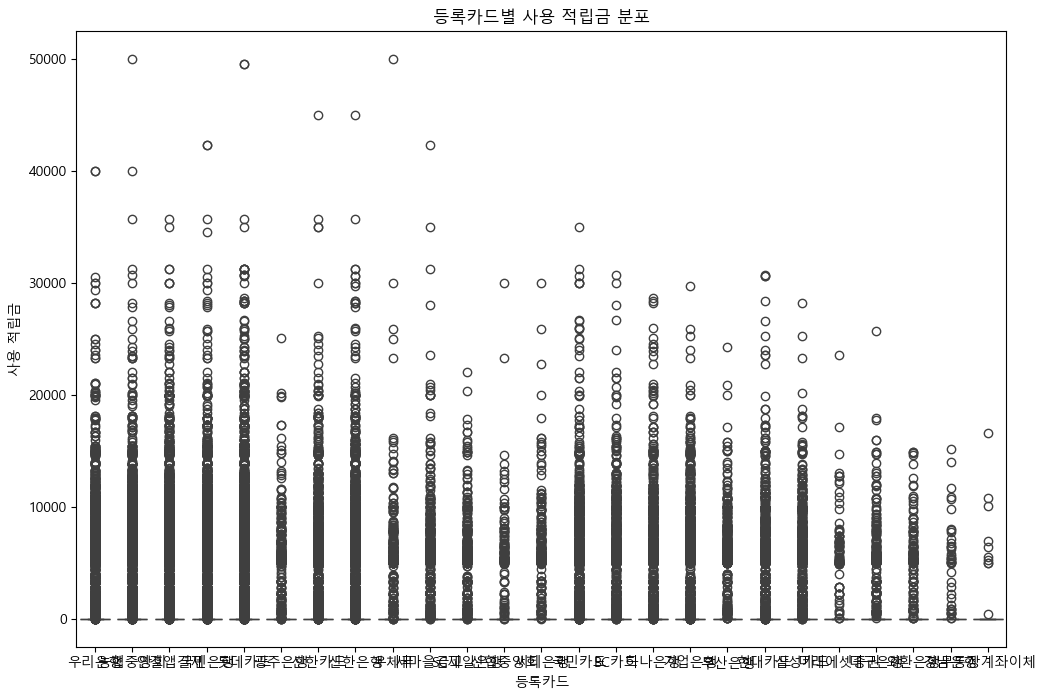

In [280]:
# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='등록카드', y='사용 적립금', data=final_data)
plt.xlabel('등록카드')
plt.ylabel('사용 적립금')
plt.title('등록카드별 사용 적립금 분포')
plt.show()

# info

In [12]:
final_data.head()

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,...,물품중분류,식품/비식품,유기신선,주문요일,연령대,이용횟수,물품명_상품중량,물품평균금액,고중저,이용횟수_범주
0,1032097472,정상회원,1.0,7083,2022-01-08,NaN,NaN,0,0,주문취소,...,논지엠오유정란,식품,신선,토요일,30대,60,유정란/친환경_10알,9924,중,적음
1,1032097472,정상회원,1.0,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,...,멥쌀,기타,비식품,토요일,30대,60,칠분도미/유_2kg,23821,고,적음
2,1032097472,정상회원,1.0,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,양념육,식품,기타,토요일,30대,60,양념닭갈비_500g,23164,고,적음
3,369152832,정상회원,1.0,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,멸치류,식품,기타,토요일,40대,100,볶음멸치/상_300g,16655,고,보통
4,1032097472,정상회원,1.0,8423,2022-01-08,NaN,NaN,0,0,주문취소,...,도라지/손질,식품,신선/유기농,토요일,30대,60,채도라지_150g,8423,중,적음


In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663794 entries, 0 to 663793
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        663794 non-null  int64  
 1   회원상태        663794 non-null  object 
 2   구매수량        663794 non-null  float64
 3   구매금액        663794 non-null  int64  
 4   주문일시        663794 non-null  object 
 5   배송시작일       633336 non-null  object 
 6   배송완료일       633336 non-null  object 
 7   사용 적립금      663794 non-null  int64  
 8   사용 포인트 네이버  663794 non-null  int64  
 9   주문취소여부      30458 non-null   object 
 10  주문시간        663794 non-null  object 
 11  제품번호        663794 non-null  object 
 12  배송기간        633336 non-null  object 
 13  오전오후        663794 non-null  object 
 14  성별          663047 non-null  object 
 15  나이          663047 non-null  float64
 16  등록카드        663047 non-null  object 
 17  결혼          663047 non-null  object 
 18  구독여부        663794 non-null  bool   
 19  주소

In [171]:
final_data['구독여부'] = final_data['구독여부'].astype('bool')

In [161]:
final_data['구매금액'] = final_data['구매금액'].astype('float64')

In [4]:
# '구독여부' 열의 각 값의 빈도 계산
value_counts = final_data['구독여부'].value_counts(dropna=False)

print(value_counts)

구독여부
False    528583
True     135211
Name: count, dtype: int64


In [9]:
# '구독여부'가 True인 경우의 수
true_count = final_data[final_data['구독여부'] == True]['회원번호'].nunique()

# '구독여부'가 False인 경우의 수
false_count = final_data[final_data['구독여부'] == False]['회원번호'].nunique()

print("구독여부가 True인 경우의 수:", true_count)
print("구독여부가 False인 경우의 수:", false_count)

구독여부가 True인 경우의 수: 3840
구독여부가 False인 경우의 수: 10707


In [10]:
final_data['회원번호'].nunique()

12533

In [11]:
# 구독여부의 비율 계산
subscription_counts = final_data['구독여부'].value_counts(dropna=False)
total_count = len(final_data['구독여부'])

# 비율 계산
subscription_ratios = subscription_counts / total_count * 100

# 비율 출력
print(subscription_ratios)

구독여부
False    79.630578
True     20.369422
Name: count, dtype: float64


# 체리슈머

In [5]:
final_data = pd.read_csv('C:/Users/campus4D045/Desktop/data/final_data.csv')

In [6]:
# 1. '이용횟수'가 중복 없이 10 이하인 데이터 필터링
filtered_data = final_data[final_data['이용횟수'] <= 10]

# 2. '주문일시'와 '주문시간'을 기준으로 그룹화하여 '구매금액'의 평균 계산
grouped_data = filtered_data.groupby(['주문일시', '주문시간'])['구매금액'].mean().reset_index()

# 3. 평균구매금액이 15,000원 이하인 그룹 필터링
result = grouped_data[grouped_data['구매금액'] <= 15000]

print(result)

             주문일시      주문시간          구매금액
0      2022-01-08  01:00:00   7275.000000
2      2022-01-08  01:22:00  10912.000000
3      2022-01-08  01:24:00   9428.500000
4      2022-01-08  01:39:00   6174.000000
5      2022-01-08  01:40:00   7370.500000
...           ...       ...           ...
10614  2022-11-06  11:58:00   7466.000000
10616  2022-11-06  12:02:00   7785.333333
10617  2022-11-06  12:08:00   7466.000000
10618  2022-11-06  12:25:00   6317.750000
10621  2022-11-06  13:00:00   1149.000000

[7236 rows x 3 columns]


In [7]:
# 1. '이용횟수'가 중복 없이 10 이하인 데이터 필터링
filtered_data = final_data[final_data['이용횟수'] <= 10]

# 2. '주문일시'와 '주문시간'을 기준으로 그룹화하여 '구매금액'의 평균 계산
grouped_data = filtered_data.groupby(['주문일시', '주문시간'])['구매금액'].mean().reset_index()

# 3. 평균구매금액이 15,000원 이하인 그룹 필터링
low_spenders = grouped_data[grouped_data['구매금액'] <= 15000]

# 4. '체리슈머'와 '일반'을 구분하여 파생변수 생성
final_data['체리슈머'] = '일반'
final_data.loc[final_data['회원번호'].isin(filtered_data['회원번호']), '체리슈머'] = '체리슈머'

# 5. '체리슈머'와 '일반'의 횟수를 조회
count_cherry_sumers = final_data['체리슈머'].value_counts()

print(count_cherry_sumers)

체리슈머
일반      640216
체리슈머     23578
Name: count, dtype: int64


In [8]:
# 1. '이용횟수'가 중복 없이 10 이하인 데이터 필터링
filtered_data = final_data[final_data['이용횟수'] <= 10]

# 2. '주문일시'와 '주문시간'을 기준으로 그룹화하여 '구매금액'의 평균 계산
grouped_data = filtered_data.groupby(['주문일시', '주문시간'])['구매금액'].mean().reset_index()

# 3. 평균구매금액이 15,000원 이하인 그룹 필터링
low_spenders = grouped_data[grouped_data['구매금액'] <= 15000]

# 4. '체리슈머'와 '일반'을 구분하여 파생변수 생성
final_data['체리슈머'] = '일반'
final_data.loc[final_data['회원번호'].isin(filtered_data['회원번호']), '체리슈머'] = '체리슈머'

# 5. '체리슈머'와 '일반'의 횟수를 조회하여 비율로 변환
count_cherry_sumers = final_data['체리슈머'].value_counts()
total_count = len(final_data)

cherry_sumers_ratio = (count_cherry_sumers / total_count) * 100

print(cherry_sumers_ratio)

체리슈머
일반      96.447994
체리슈머     3.552006
Name: count, dtype: float64


In [18]:
final_data.head()

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,...,식품/비식품,유기신선,주문요일,연령대,이용횟수,물품명_상품중량,물품평균금액,고중저,이용횟수_범주,체리슈머
0,1032097472,정상회원,1.0,7083,2022-01-08,NaN,NaN,0,0,주문취소,...,식품,신선,토요일,30대,60,유정란/친환경_10알,9924,중,적음,일반
1,1032097472,정상회원,1.0,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,...,기타,비식품,토요일,30대,60,칠분도미/유_2kg,23821,고,적음,일반
2,1032097472,정상회원,1.0,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,식품,기타,토요일,30대,60,양념닭갈비_500g,23164,고,적음,일반
3,369152832,정상회원,1.0,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,...,식품,기타,토요일,40대,100,볶음멸치/상_300g,16655,고,보통,일반
4,1032097472,정상회원,1.0,8423,2022-01-08,NaN,NaN,0,0,주문취소,...,식품,신선/유기농,토요일,30대,60,채도라지_150g,8423,중,적음,일반


In [21]:
# 1. 데이터 준비: '연령대'와 '체리슈머' 변수를 사용하여 교차표 생성
crosstab = pd.crosstab(final_data['연령대'], final_data['체리슈머'])

# 2. 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(crosstab)

# 3. 결과 해석
print("카이제곱 통계량: ", chi2)
print("p-value: ", p)
print("자유도: ", dof)
print("기대값 행렬: \n", expected)

# p-value를 기준으로 유의성 판단
if p < 0.05:
    print("유의수준 0.05에서 연령대와 체리슈머 여부는 독립이 아닙니다.")
else:
    print("유의수준 0.05에서 연령대와 체리슈머 여부는 독립입니다.")

카이제곱 통계량:  1016.5094654694424
p-value:  3.262411881362148e-215
자유도:  7
기대값 행렬: 
 [[4.61021413e+02 1.69785867e+01]
 [5.60198886e+04 2.06311141e+03]
 [2.25169417e+05 8.29258330e+03]
 [1.90738447e+05 7.02455282e+03]
 [9.98014912e+04 3.67550883e+03]
 [5.40716391e+04 1.99136090e+03]
 [1.24466137e+04 4.58386322e+02]
 [1.50748215e+03 5.55178474e+01]]
유의수준 0.05에서 연령대와 체리슈머 여부는 독립이 아닙니다.


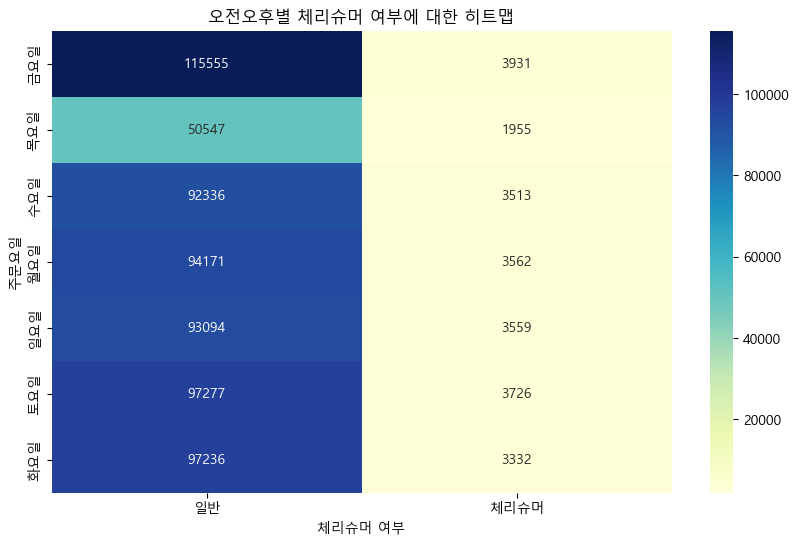

카이제곱 통계량:  61.56285688823948
p-value:  2.1654196263357466e-11
자유도:  6
기대값 행렬: 
 [[115241.85059823   4244.14940177]
 [ 50637.12602404   1864.87397596]
 [ 92444.43816003   3404.56183997]
 [ 94261.51837468   3471.48162532]
 [ 93219.88003507   3433.11996493]
 [ 97415.36779181   3587.63220819]
 [ 96995.81901614   3572.18098386]]


In [28]:
# 1. 데이터 준비: '연령대'와 '체리슈머' 변수를 사용하여 교차표 생성
crosstab = pd.crosstab(final_data['주문요일'], final_data['체리슈머'])

# 2. 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(crosstab)

# 3. 히트맵 생성: 관측값과 기대값의 차이를 히트맵으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title('오전오후별 체리슈머 여부에 대한 히트맵')
plt.xlabel('체리슈머 여부')
plt.ylabel('주문요일')
plt.show()

# 카이제곱 검정 결과 출력
print("카이제곱 통계량: ", chi2)
print("p-value: ", p)
print("자유도: ", dof)
print("기대값 행렬: \n", expected)

In [29]:
# 1. '체리슈머'에 해당하는 데이터 필터링
cherry_sumers_data = final_data[final_data['체리슈머'] == '체리슈머']

# 2. '주문시간'을 기준으로 그룹화하여 각 그룹의 크기 계산
order_time_counts = cherry_sumers_data['주문시간'].value_counts()

# 3. 가장 많은 주문이 발생한 '주문시간' 찾기
most_common_order_time = order_time_counts.idxmax()
most_common_order_count = order_time_counts.max()

print(f"체리슈머에 해당하는 주문이 가장 많은 주문시간: {most_common_order_time}")
print(f"해당 주문시간의 주문 수: {most_common_order_count}")

체리슈머에 해당하는 주문이 가장 많은 주문시간: 03:00:00
해당 주문시간의 주문 수: 121


In [30]:
# '구독여부' 열의 각 값의 빈도 계산
value_counts = final_data['회원상태'].value_counts(dropna=False)

print(value_counts)

회원상태
정상회원     656314
탈퇴         7336
탈퇴처리중       131
탈퇴신청         13
Name: count, dtype: int64


In [31]:
# 구독여부의 비율 계산
subscription_counts = final_data['회원상태'].value_counts(dropna=False)
total_count = len(final_data['회원상태'])

# 비율 계산
subscription_ratios = subscription_counts / total_count * 100

# 비율 출력
print(subscription_ratios)

회원상태
정상회원     98.873144
탈퇴        1.105162
탈퇴처리중     0.019735
탈퇴신청      0.001958
Name: count, dtype: float64


In [33]:
final_data['회원상태'].value_counts

<bound method IndexOpsMixin.value_counts of 0         정상회원
1         정상회원
2         정상회원
3         정상회원
4         정상회원
          ... 
663789    정상회원
663790    정상회원
663791    정상회원
663792    정상회원
663793    정상회원
Name: 회원상태, Length: 663794, dtype: object>

# 유기농 신선/유기농

In [9]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663794 entries, 0 to 663793
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        663794 non-null  int64  
 1   회원상태        663794 non-null  object 
 2   구매수량        663794 non-null  float64
 3   구매금액        663794 non-null  int64  
 4   주문일시        663794 non-null  object 
 5   배송시작일       633336 non-null  object 
 6   배송완료일       633336 non-null  object 
 7   사용 적립금      663794 non-null  int64  
 8   사용 포인트 네이버  663794 non-null  int64  
 9   주문취소여부      30458 non-null   object 
 10  주문시간        663794 non-null  object 
 11  제품번호        663794 non-null  object 
 12  배송기간        633336 non-null  object 
 13  오전오후        663794 non-null  object 
 14  성별          663047 non-null  object 
 15  나이          663047 non-null  float64
 16  등록카드        663047 non-null  object 
 17  결혼          663047 non-null  object 
 18  구독여부        663794 non-null  bool   
 19  주소

In [15]:
final_data['유기신선'].unique()

array(['신선', '비식품', '기타', '신선/유기농', '유기농'], dtype=object)

F-statistic: 45.341825741323376, p-value: 1.2358437845244388e-64


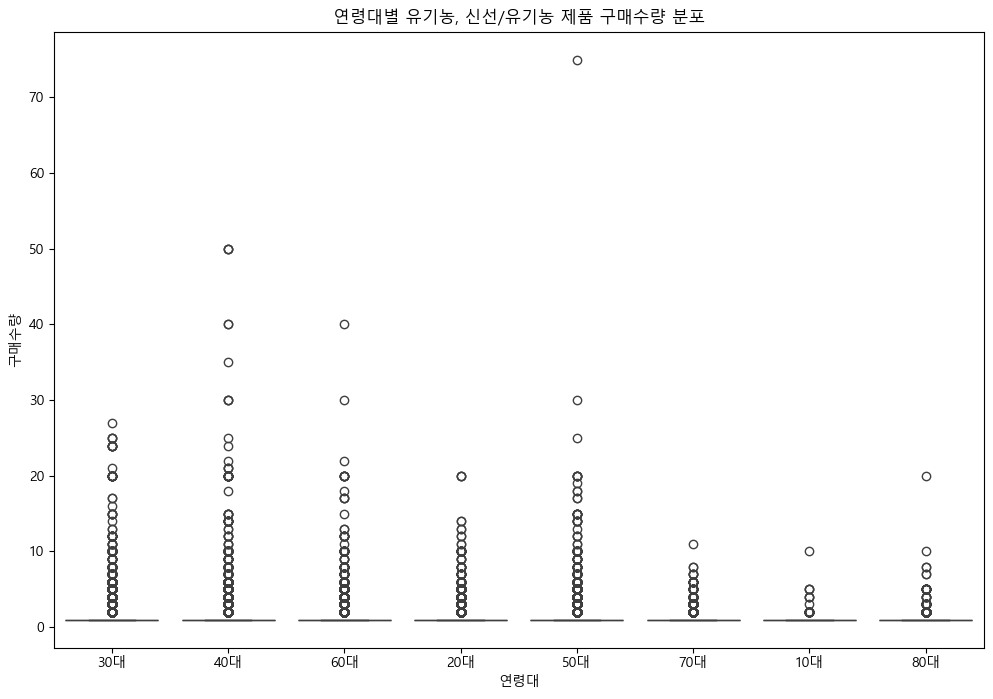

In [24]:
# '유기농'과 '신선/유기농'이 포함된 데이터 필터링
filtered_data = final_data[final_data['유기신선'].isin(['유기농', '신선/유기농'])]

# 연령대별 구매 수량 데이터 분리
age_groups = filtered_data['연령대'].unique()
purchase_quantities = [filtered_data[filtered_data['연령대'] == age_group]['구매수량'] for age_group in age_groups]

# 아노바 검정 수행
f_stat, p_val = stats.f_oneway(*purchase_quantities)

print(f'F-statistic: {f_stat}, p-value: {p_val}')

# 박스 플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='연령대', y='구매수량', data=filtered_data)
plt.title('연령대별 유기농, 신선/유기농 제품 구매수량 분포')
plt.xlabel('연령대')
plt.ylabel('구매수량')
plt.show()

In [23]:
# '유기농'과 '신선/유기농'이 포함된 데이터 필터링
filtered_data = final_data[final_data['유기신선'].isin(['유기농', '신선/유기농'])]

# 연령대별 구매 수량 합계 계산
grouped_data = filtered_data.groupby('연령대')['구매수량'].sum().reset_index()

# 구매 수량이 많은 순서대로 정렬
sorted_data = grouped_data.sort_values(by='구매수량', ascending=False).reset_index(drop=True)

print(sorted_data)

   연령대      구매수량
0  30대  165329.0
1  40대  140982.0
2  50대   78981.0
3  60대   43900.0
4  20대   42752.0
5  70대    9484.0
6  80대    1222.0
7  10대     339.0


In [35]:
# '유기농'과 '신선/유기농'이 포함된 데이터 필터링
filtered_data = final_data[final_data['유기신선'].isin(['유기농', '신선/유기농'])]

# 연령대별, 유기신선별 구매 수량 합계 계산
grouped_data = filtered_data.groupby(['연령대', '유기신선'])['구매수량'].sum().reset_index()

# 피벗 테이블 생성 (연령대별, 유기신선별 구매 수량)
pivot_table = grouped_data.pivot(index='연령대', columns='유기신선', values='구매수량').fillna(0)

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(pivot_table)

print(f'Chi2 statistic: {chi2}, p-value: {p}')

# 결과 해석
if p < 0.05:
    print("p-value가 0.05보다 작습니다. 연령대와 구매 수량 간에 유의미한 관계가 있습니다.")
else:
    print("p-value가 0.05보다 큽니다. 연령대와 구매 수량 간에 유의미한 관계가 없습니다.")

Chi2 statistic: 6009.250191552232, p-value: 0.0
p-value가 0.05보다 작습니다. 연령대와 구매 수량 간에 유의미한 관계가 있습니다.


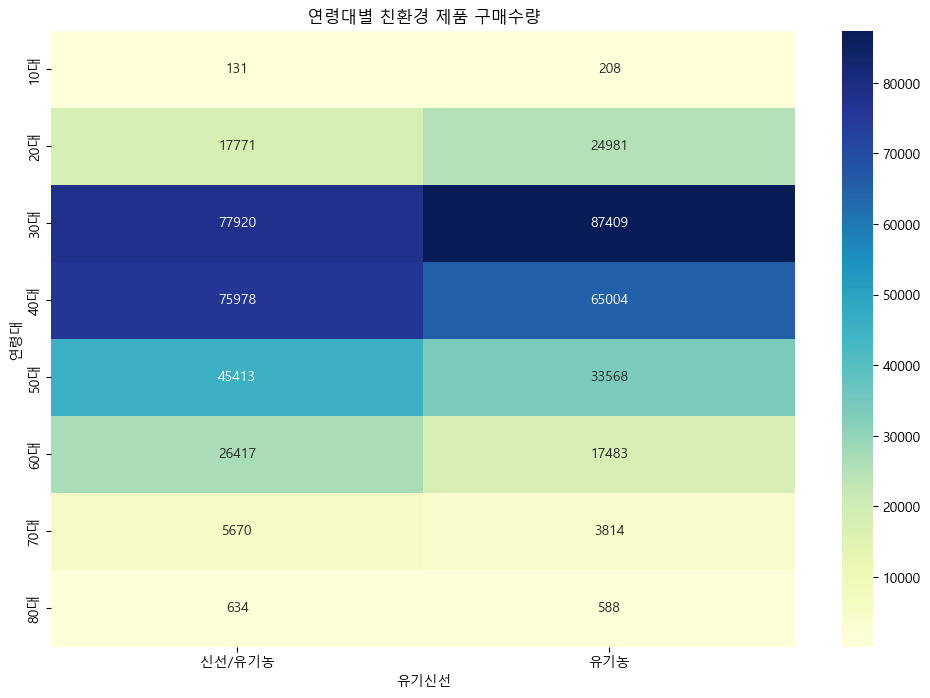

In [34]:
# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('연령대별 친환경 제품 구매수량')
plt.xlabel('유기신선')
plt.ylabel('연령대')
plt.savefig('age_group_organic_fresh_purchase_heatmap.png')
plt.show()

In [32]:
# 연령대와 유기신선 간의 교차표 생성
contingency_table = pd.crosstab(final_data['연령대'], final_data['유기신선'])

# 교차표 출력
print("연령대와 '유기신선' 간의 교차표:")
print(contingency_table)

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("\nChi-squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# p-value에 따른 해석
alpha = 0.05
if p_value < alpha:
    print("\n귀무가설을 기각합니다. 연령대와 유기신선 간에는 유의미한 관계가 있습니다.")
else:
    print("\n귀무가설을 기각하지 않습니다. 연령대와 유기신선 간에는 유의미한 관계가 없습니다.")

연령대와 '유기신선' 간의 교차표:
유기신선     기타    비식품     신선  신선/유기농    유기농
연령대                                     
10대      35     41    127     119    156
20대    3988   2968  14716   16341  20070
30대   17991  13001  62432   70704  69334
40대   14977  10520  54533   67114  50619
50대    6580   4834  27267   38646  26150
60대    3139   2251  15146   22133  13394
70대     755    543   3599    5032   2976
80대     145     36    485     486    411

Chi-squared Statistic: 5608.356385449581
p-value: 0.0
Degrees of Freedom: 28
Expected Frequencies Table:
 [[3.42841002e+01 2.46231994e+01 1.28397952e+02 1.58836702e+02
  1.31858046e+02]
 [4.16594852e+03 2.99202780e+03 1.56019628e+04 1.93006531e+04
  1.60224077e+04]
 [1.67448423e+04 1.20263209e+04 6.27113862e+04 7.75781050e+04
  6.44013456e+04]
 [1.41843651e+04 1.01873594e+04 5.31221007e+04 6.57155288e+04
  5.45536461e+04]
 [7.42179045e+03 5.33040753e+03 2.77954704e+04 3.43848231e+04
  2.85445085e+04]
 [4.02106592e+03 2.88797160e+03 1.50593606e+04 1.86294185e+04
 